# Métodos Estatísticos em Data Mining
### Projeto 2

##### Grupo 10:
- 88174 Marisa Pereira 
- 89616 Beatriz Silva  
- 89629 João Batista 
- 89640 Tomás Freire


May 31st, 2021

# 1. Libraries

In [1]:
#install.packages("mice")
#install.packages("corrplot")
#install.packages("ggplot2")
#install.packages("psych")
#install.packages("MASS")
#install.packages("comprehenr")
#install.packages("rpart")
#install.packages("rpart.plot")
#install.packages("caTools")
#install.packages("neuralnet")
#install.packages("logisticPCA")
#install.packages("mlr") 
#install.packages("imbalance") 
#install.packages("caret")
#install.packages("sats")
#install.packages("dplyr")
#install.packages("tidyverse")
#install.packages("funModeling")
#install.packages("Hmisc")
#install.packages("factoextra")
#install.packages("ggplot2")
#install.packages("grid")
#install.packages("devtools")
#install.packages("factoextra")
#install.packages("e1071")
#install.packages("caret")
#install.packages("pROC")
#install.packages("base")
#install.packages("MLmetrics")
#install.packages("nnet")
#install.packages("rpart")
#install.packages("rpart.plot")
#install.packages("klaR")
#install.packages("imbalance")
#install.packages("cluster")
#install.packages("clusterCrit")
#install.packages("fpc")
#install.packages("dbscan")
#install.packages("kernlab")
#install.packages("ClusterR", repos='http://cran.us.r-project.org')
#install.packages("factoextra")
#install.packages("gmp", repos='http://cran.us.r-project.org')
#install.packages("Spectrum")
#install.packages("mstknnclust")
#install.packages("gmp")
#install.packages("ClusterR")

In [2]:
library("stats")
library("dplyr")
#library("tidyverse")
library("funModeling")
library("Hmisc")
library("ggplot2")
library("grid")
library("factoextra")
library("devtools")
library("plyr")
library("factoextra")
library("e1071")
library("caret")
library("pROC")
library("base")
library("MLmetrics")
library("nnet")
library("rpart")
library("rpart.plot")
library("klaR")
library("imbalance")
library("MASS")
library("comprehenr")
library("cluster")
library("clusterCrit")
library("fpc")
library("dbscan")
library("kernlab")
library("factoextra")
library("mstknnclust")
#library("Spectrum")

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'funModeling' was built under R version 3.6.3"Loading required package: Hmisc
Warning message:
"package 'Hmisc' was built under R version 3.6.3"Loading required package: lattice
Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.3"Loading required package: Formula
Warning message:
"package 'Formula' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units

funModeling v.1.9.4 :)
Examples and tuto

# 2. Loading the Datasets

In [5]:
df <- read.csv("data_final.csv")
df$resposta<- as.factor(df$resposta)

# 2. Clustering 

In [6]:
# Single, complete and average linkage + Ward Method
data_single<-agnes(df[,-c(1,35)], metric = "euclidean",stand = FALSE, method = "single", keep.data = FALSE)
data_complete<-agnes(df[,-c(1,35)], metric = "euclidean",stand = FALSE, method = "complete", keep.data = FALSE)
data_average<-agnes(df[,-c(1,35)], metric = "euclidean",stand = FALSE, method = "average", keep.data = FALSE)
data_ward<-agnes(df[,-c(1,35)], metric = "euclidean",stand = FALSE, method = "ward", keep.data = FALSE)
data_diana<-diana(df[,-c(1,35)], metric = "euclidean",stand = FALSE,  keep.data = FALSE)

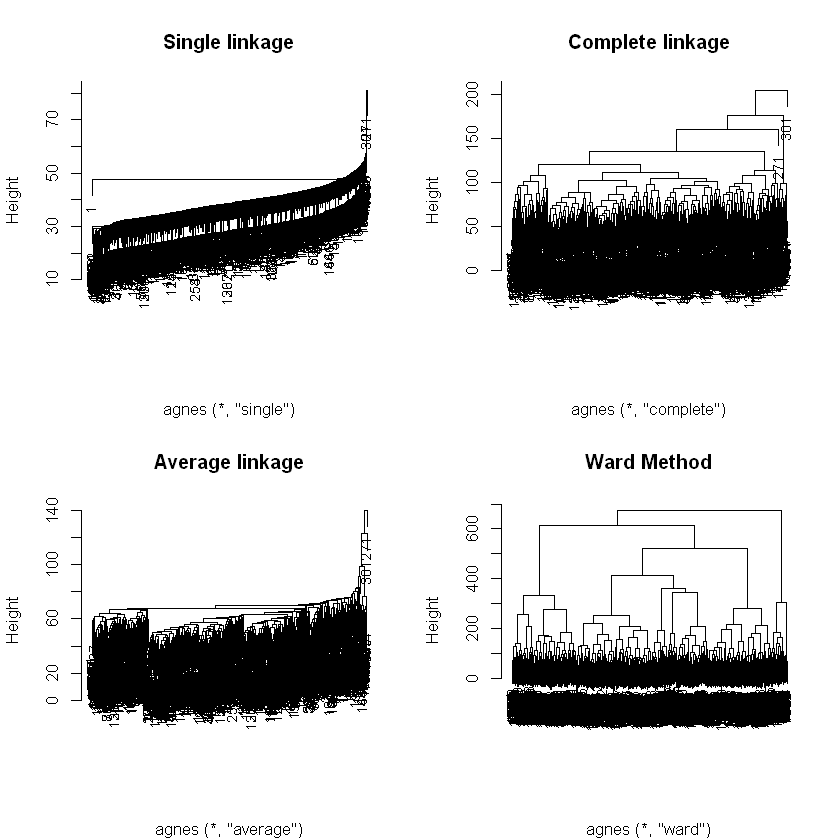

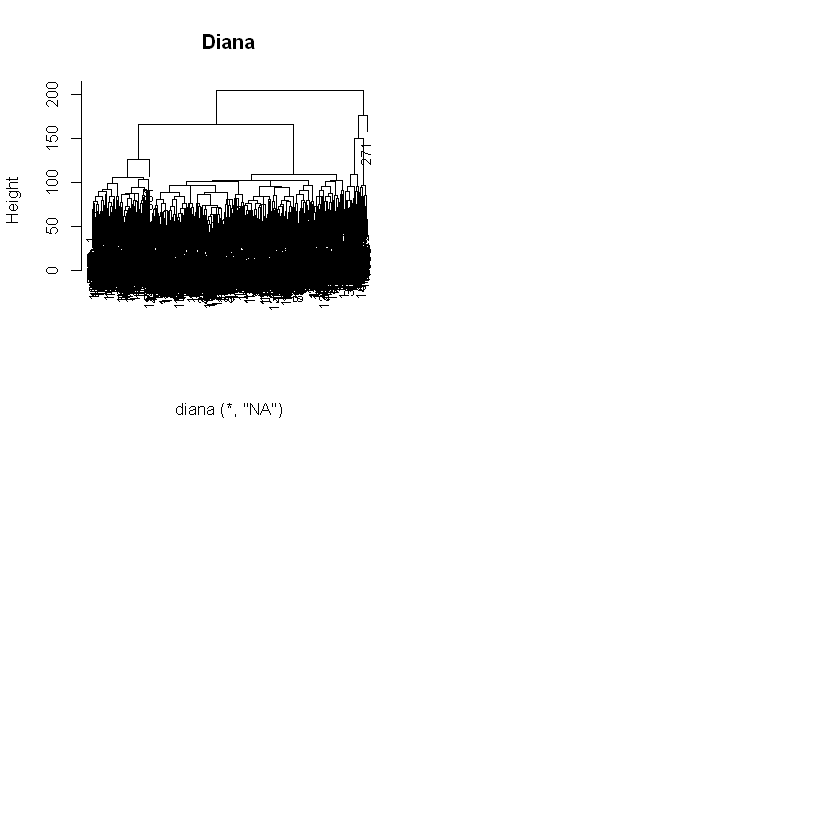

In [7]:
#Dendogram for Single, complete and average linkage + Ward Method
par(mfrow=c(2,2))
pltree(data_single,main="Single linkage", cex=0.83,xlab="")
pltree(data_complete,main="Complete linkage",cex=0.83,xlab="")
pltree(data_average,main="Average linkage", cex=0.83,xlab="")
pltree(data_ward,main="Ward Method", cex=0.83,xlab="")
pltree(data_diana,main="Diana", cex=0.83,xlab="")
par(mfrow=c(1,1))

best number of clusters for these hierartical methods:

In [8]:
show <- function(ASW){
print(ks[which.max(ASW[1,])])
print(ks[which.min(ASW[2,])])
print(ks[which.max(ASW[3,])])
print(ks[which.min(ASW[4,])])

plot(ks, ASW[1,], type="l")
abline(v=ks[which.max(ASW[1,])], col="red", lty=2)

plot(ks, ASW[2,], type="l")
abline(v=ks[which.min(ASW[2,])], col="red", lty=2)

plot(ks, ASW[3,], type="l")
abline(v=ks[which.max(ASW[3,])], col="red", lty=2)

plot(ks, ASW[4,], type="l")
abline(v=ks[which.min(ASW[4,])], col="red", lty=2)
}

[1] 3
[1] 2
[1] 2
[1] 19


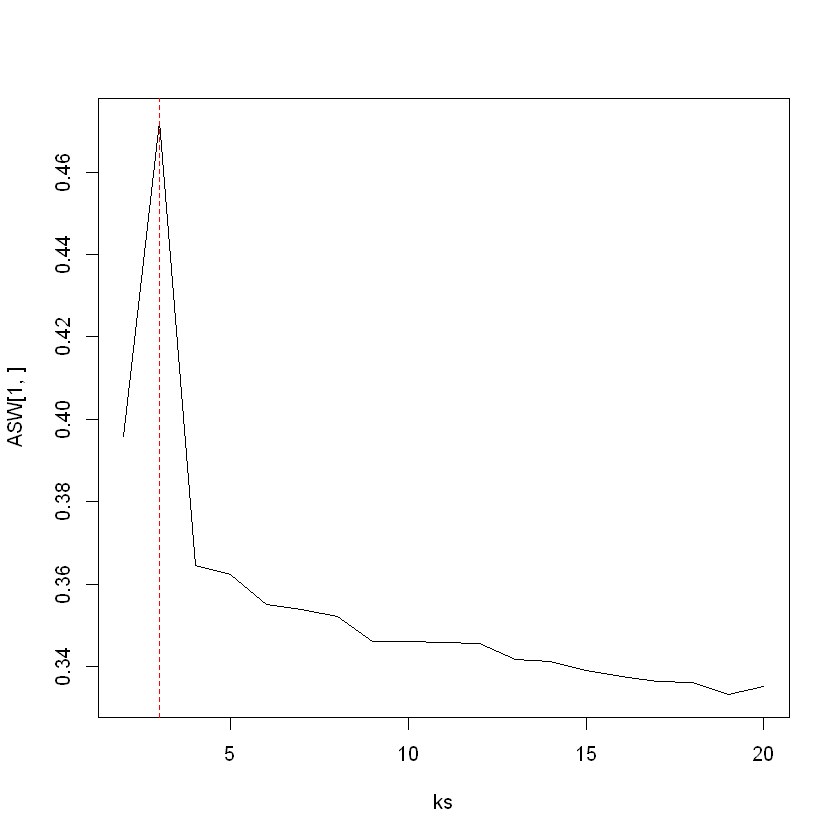

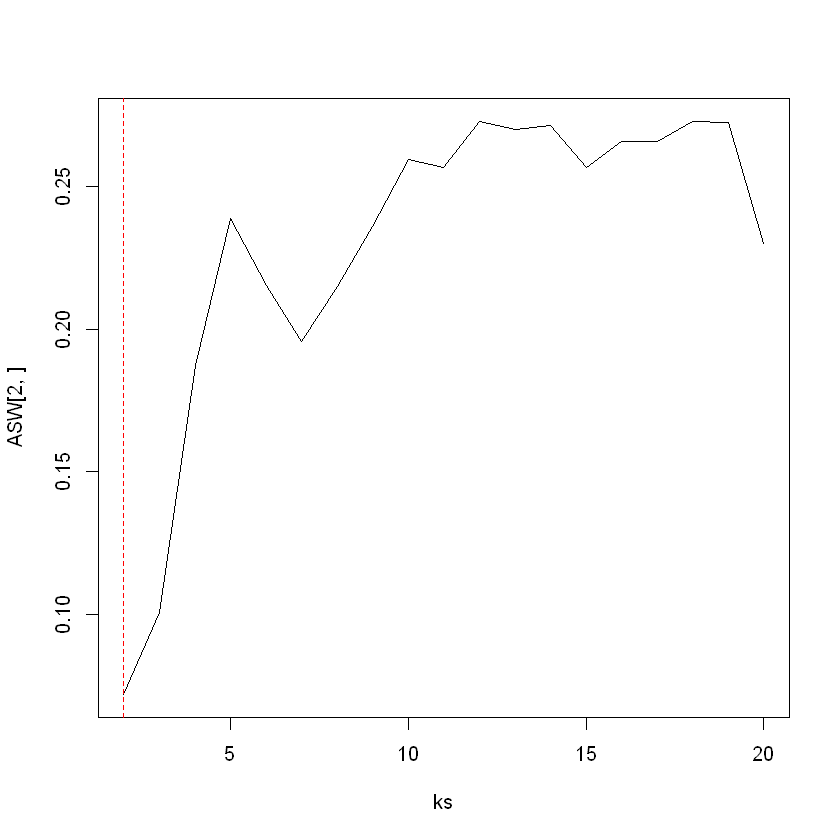

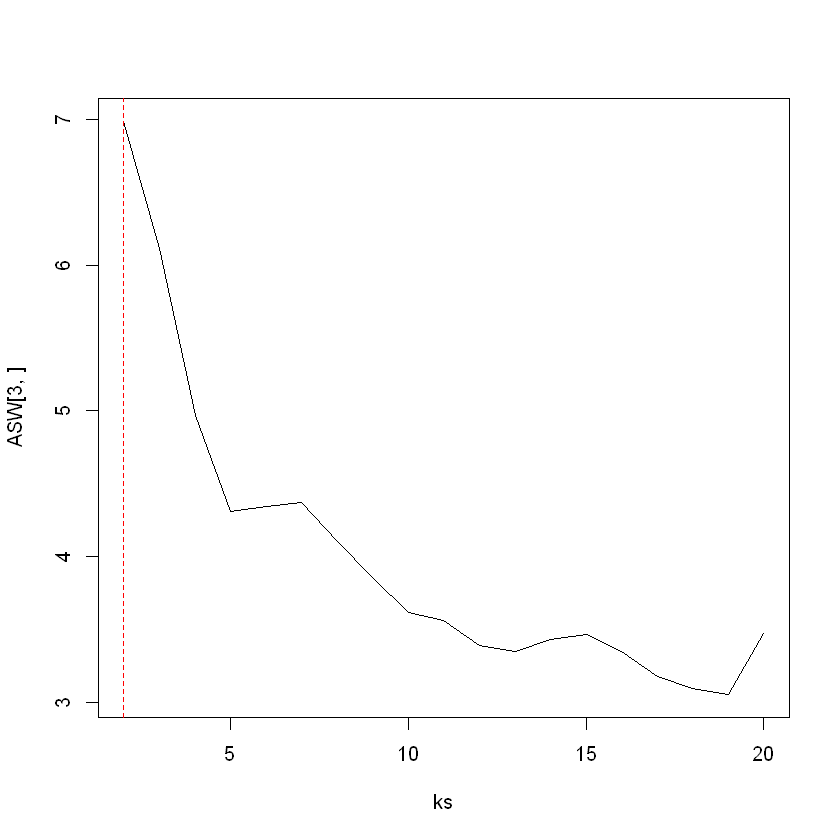

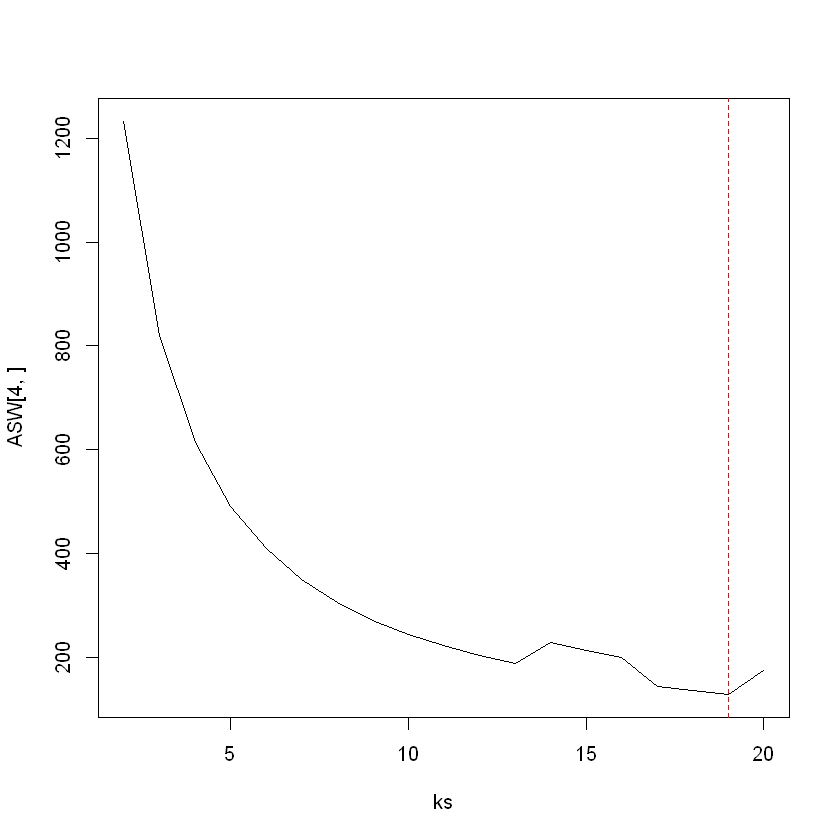

In [12]:
ks <- 2:20
ASW <- sapply(ks, FUN=function(k) {
  data_aux <- cutree(data_single,k)
  as.numeric(intCriteria(as.matrix(df[,-c(1,35)]),data_aux,c("Dunn","C_index","Calinski_Harabasz","Ball_Hall")))
})
show(ASW)

[1] 2
[1] 4
[1] 3
[1] 4


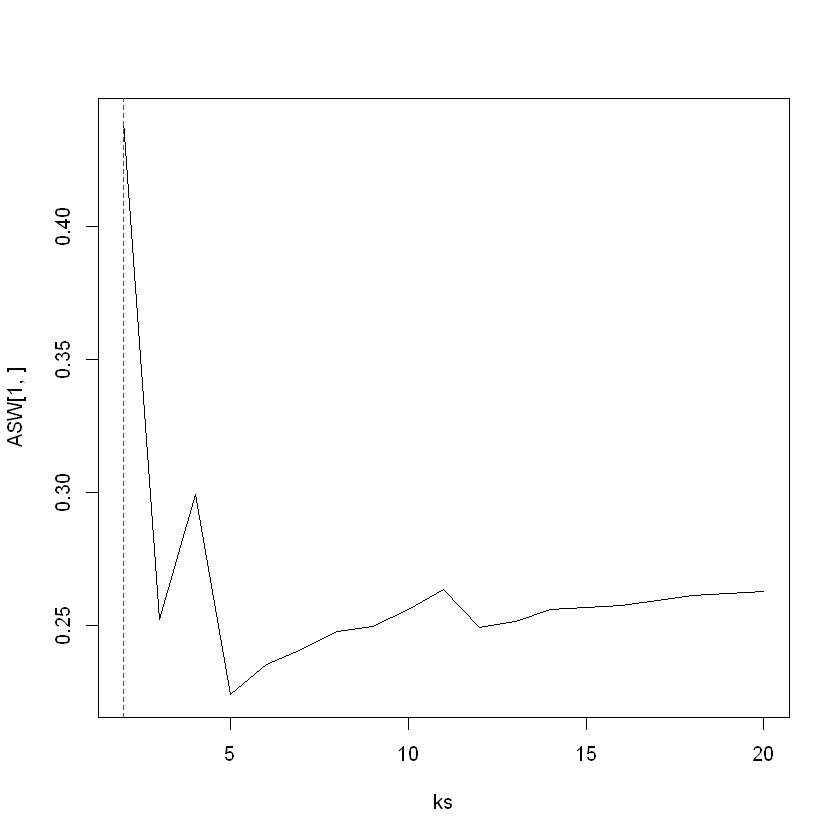

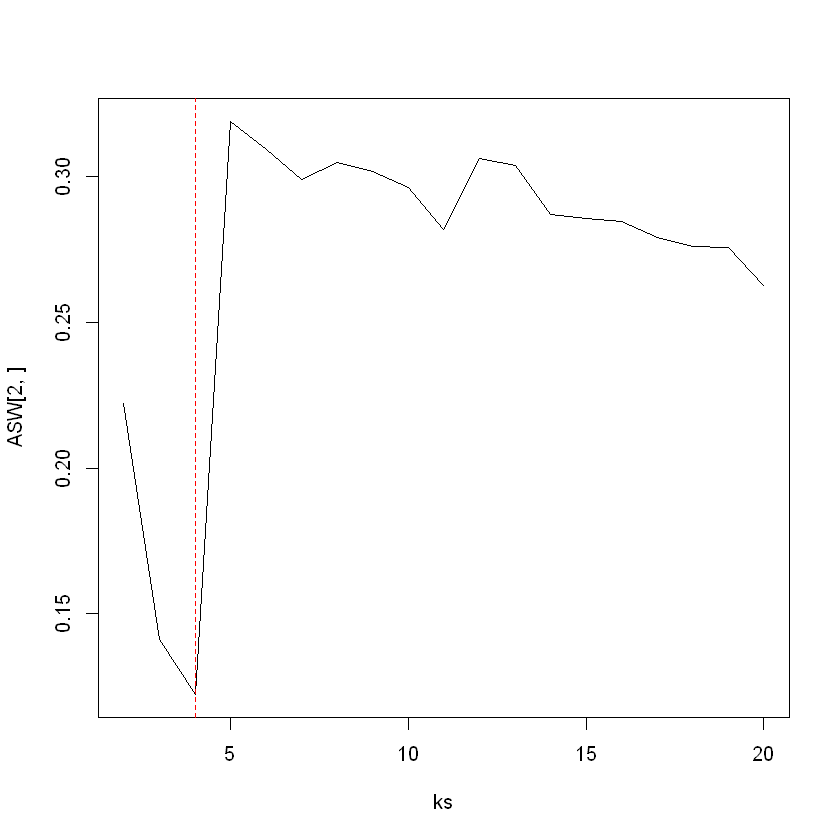

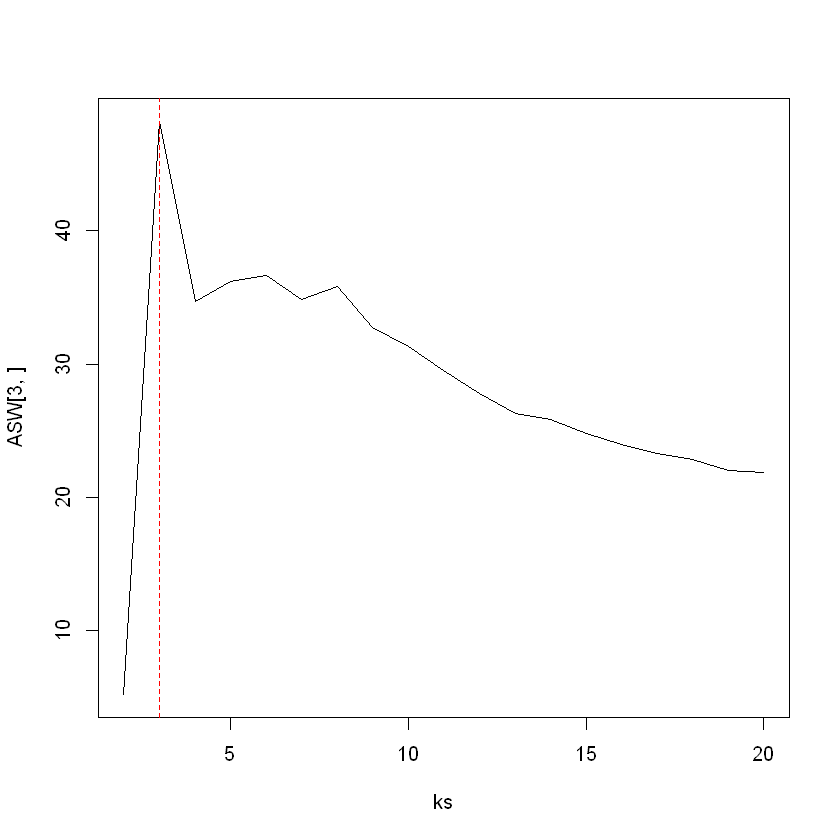

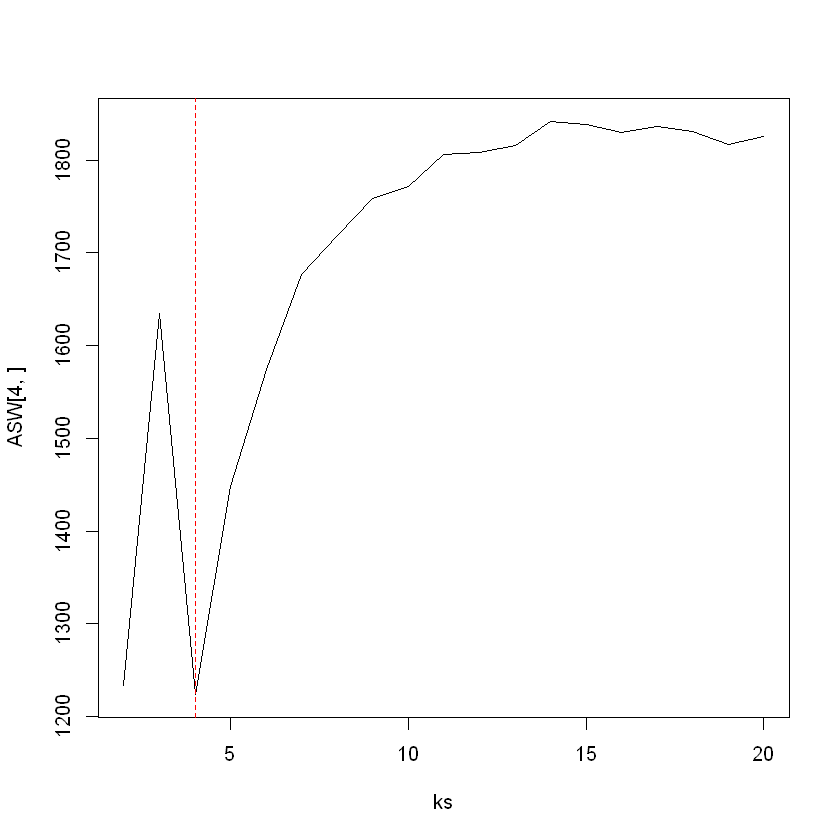

In [13]:
ks <- 2:20
ASW <- sapply(ks, FUN=function(k) {
  data_aux <- cutree(data_complete,k)
  as.numeric(intCriteria(as.matrix(df[,-c(1,35)]),data_aux,c("Dunn","C_index","Calinski_Harabasz","Ball_Hall")))
})
show(ASW)

[1] 3
[1] 2
[1] 4
[1] 3


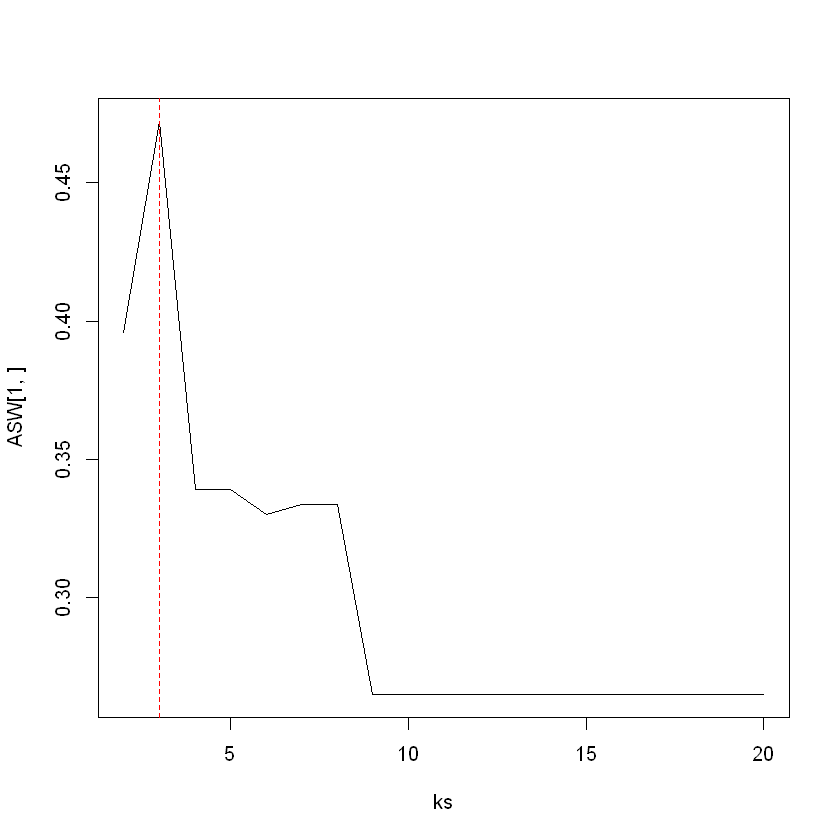

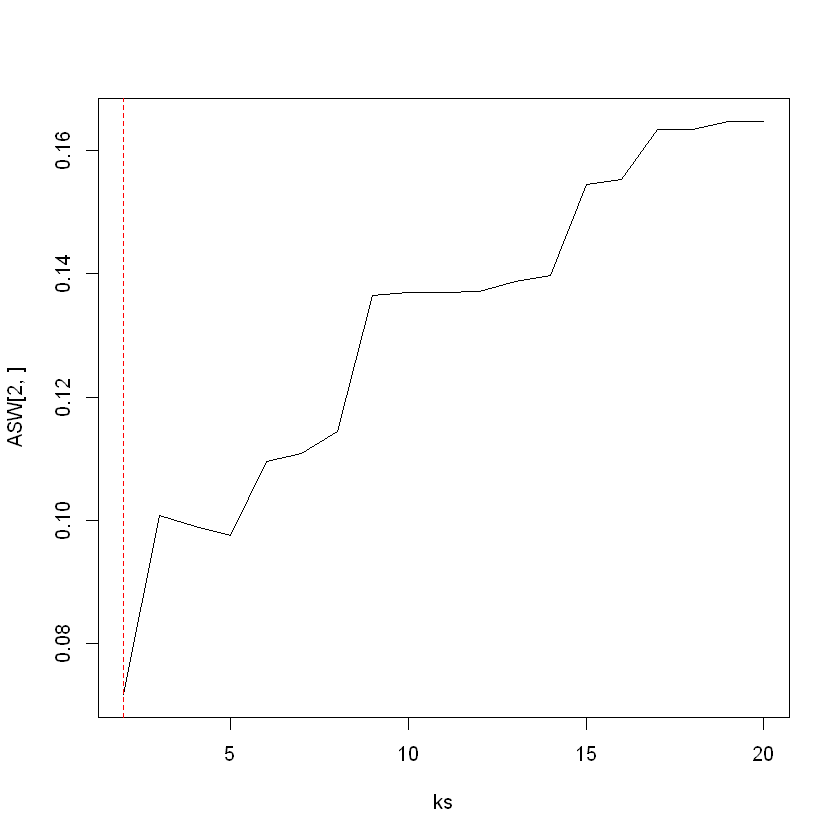

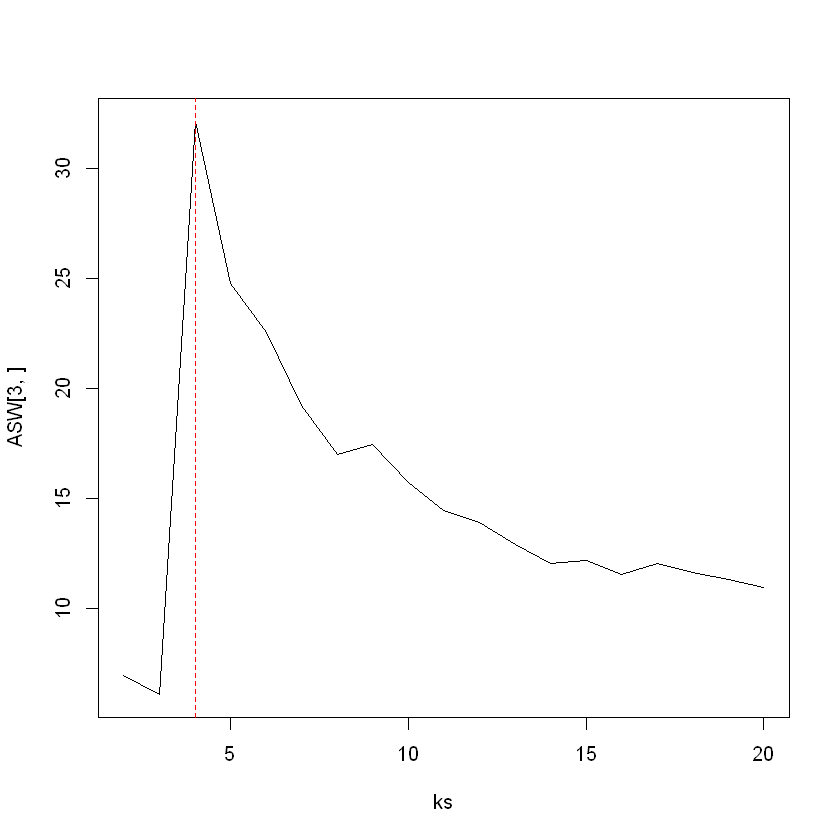

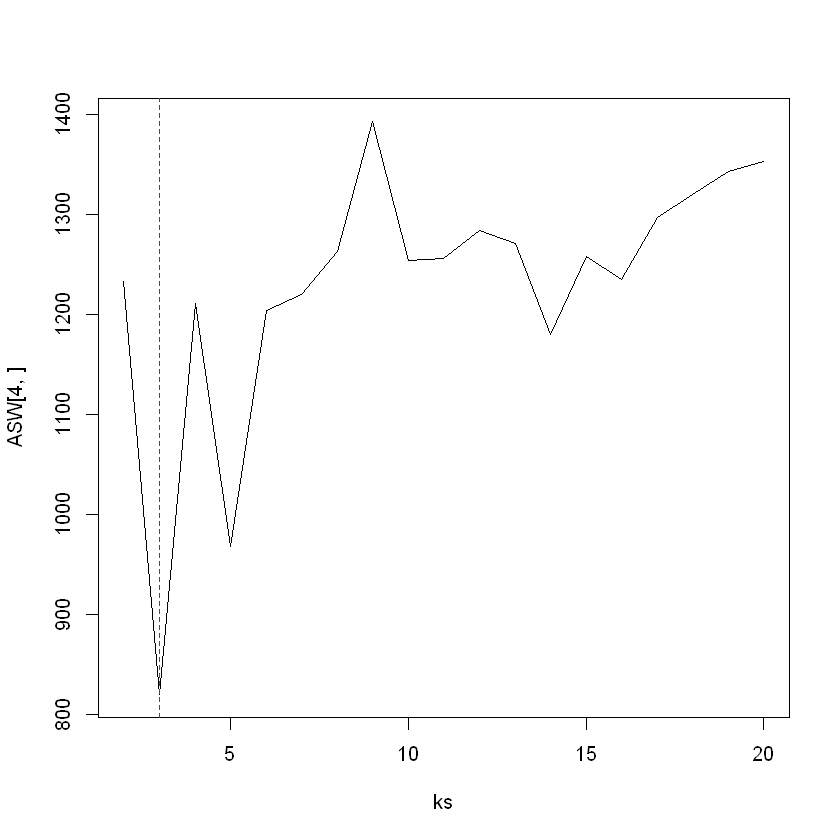

In [14]:
ks <- 2:20
ASW <- sapply(ks, FUN=function(k) {
  data_aux <- cutree(data_average,k)
  as.numeric(intCriteria(as.matrix(df[,-c(1,35)]),data_aux,c("Dunn","C_index","Calinski_Harabasz","Ball_Hall")))
})
show(ASW)

[1] 2
[1] 12
[1] 2
[1] 20


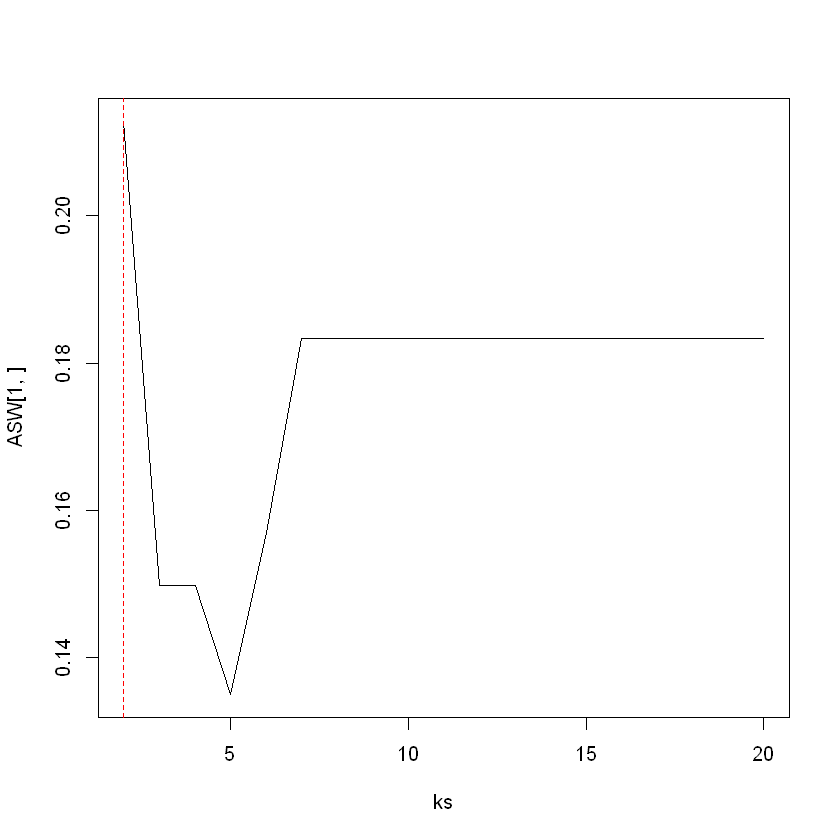

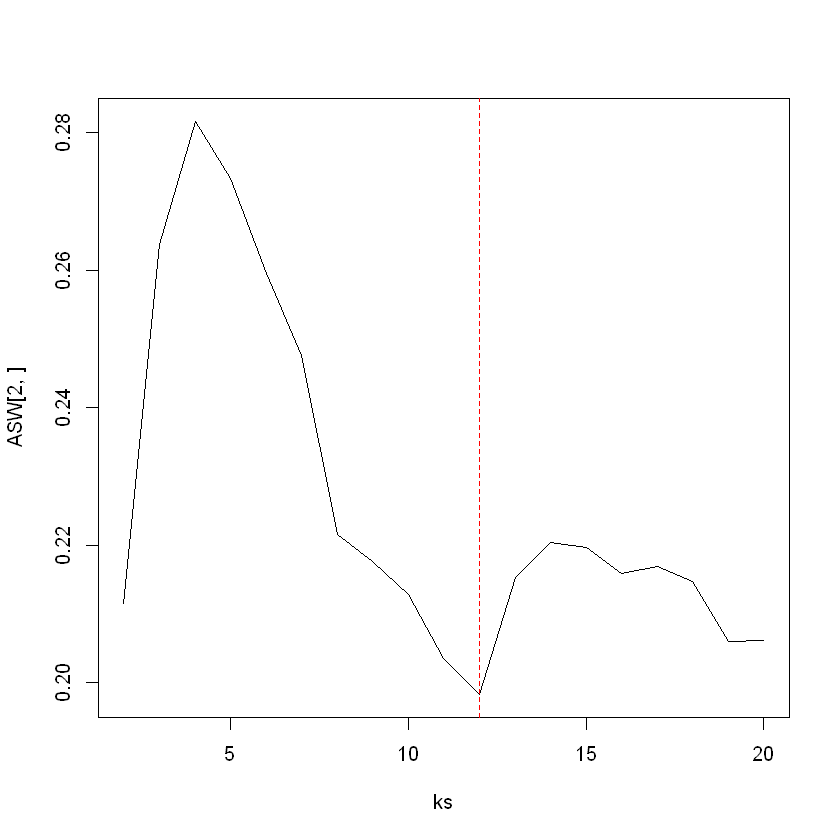

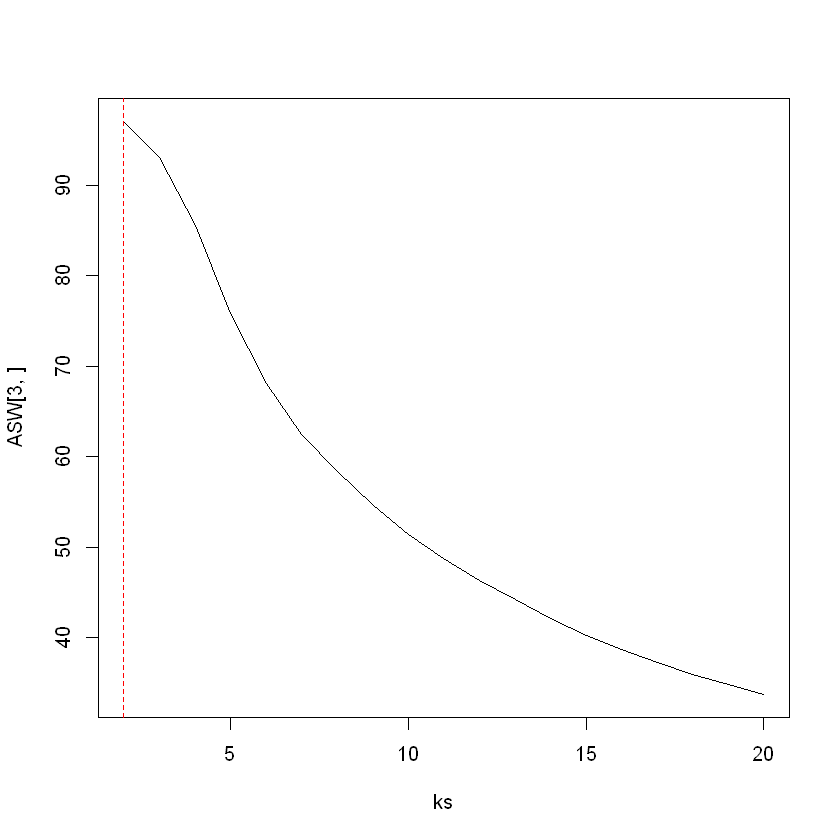

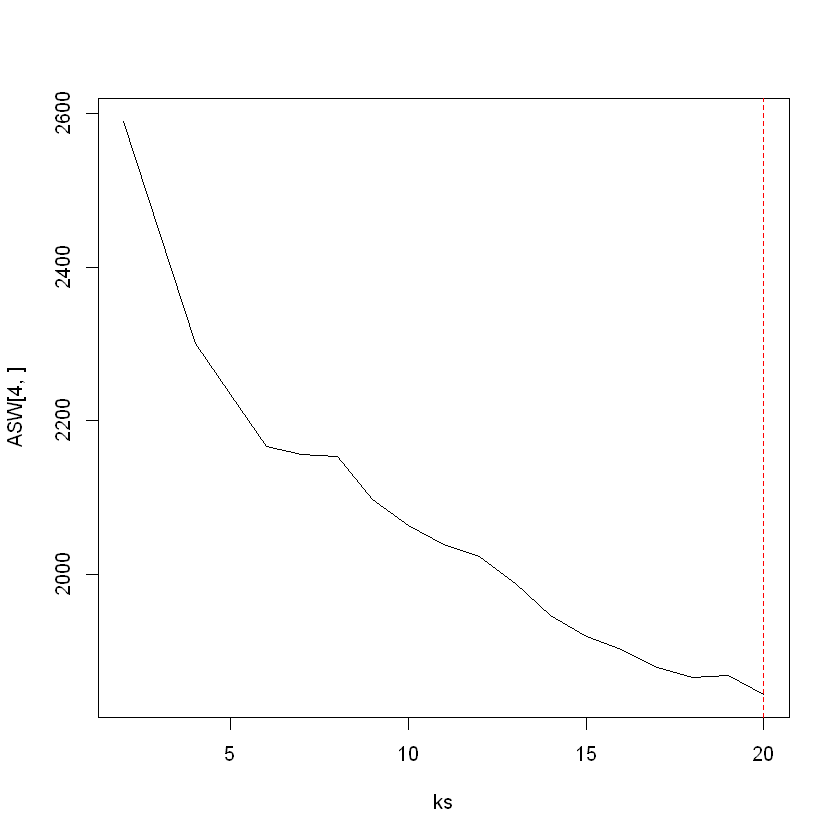

In [15]:
ks <- 2:20
ASW <- sapply(ks, FUN=function(k) {
  data_aux <- cutree(data_ward,k)
  as.numeric(intCriteria(as.matrix(df[,-c(1,35)]),data_aux,c("Dunn","C_index","Calinski_Harabasz","Ball_Hall")))
})
show(ASW)

[1] 19
[1] 18
[1] 2
[1] 6


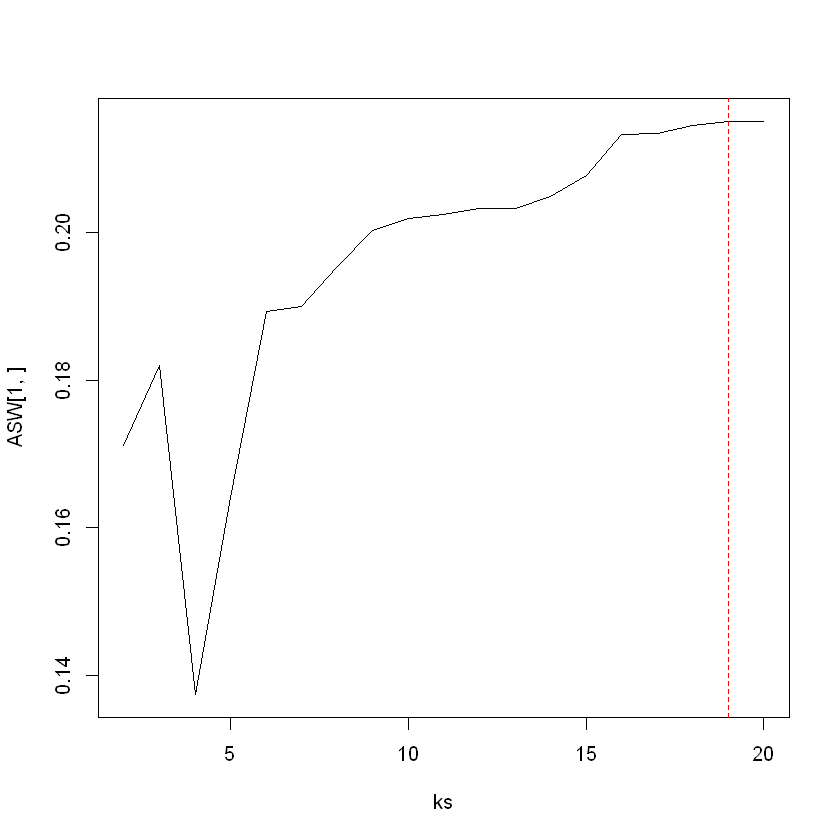

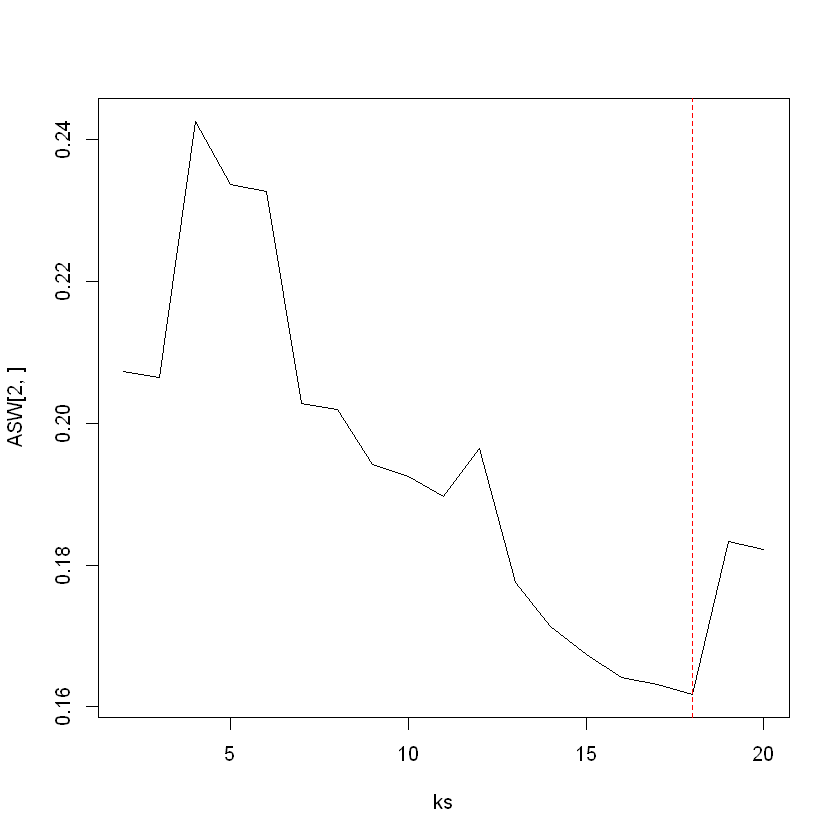

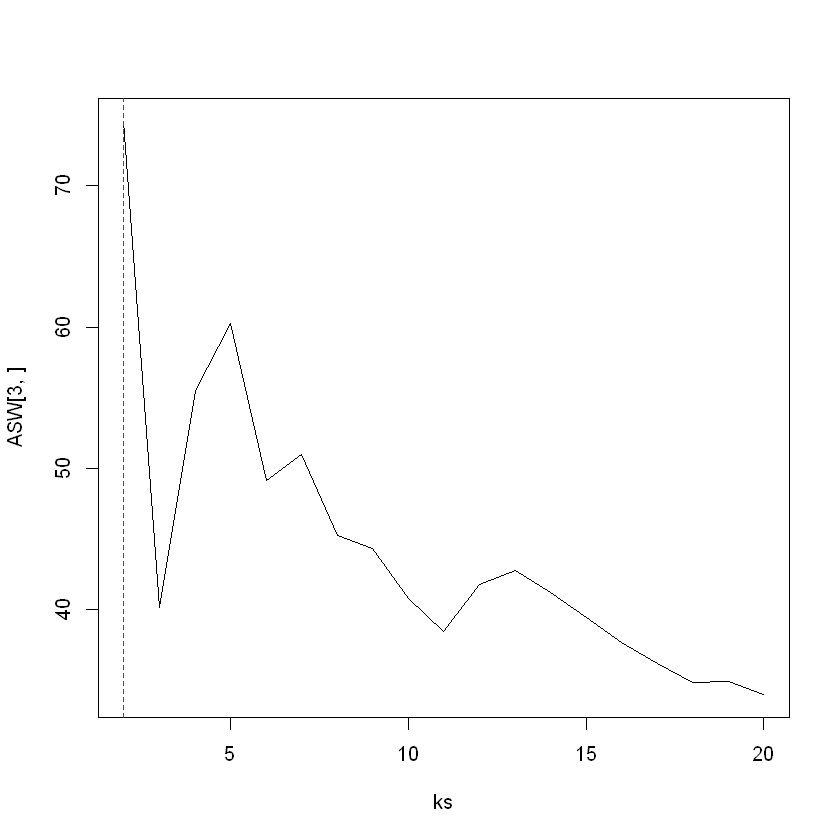

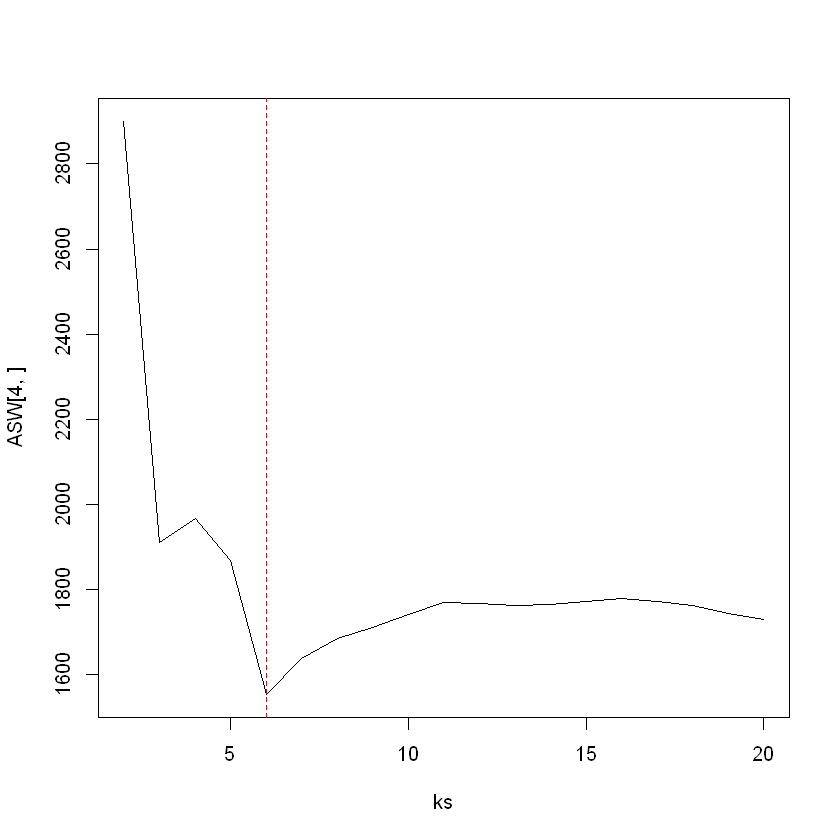

In [16]:
ks <- 2:20
ASW <- sapply(ks, FUN=function(k) {
  data_aux <- cutree(data_diana,k)
  as.numeric(intCriteria(as.matrix(df[,-c(1,35)]),data_aux,c("Dunn","C_index","Calinski_Harabasz","Ball_Hall")))
})
show(ASW)

Best number of cluster for partition methods:

[1] 17
[1] 20
[1] 2
[1] 20


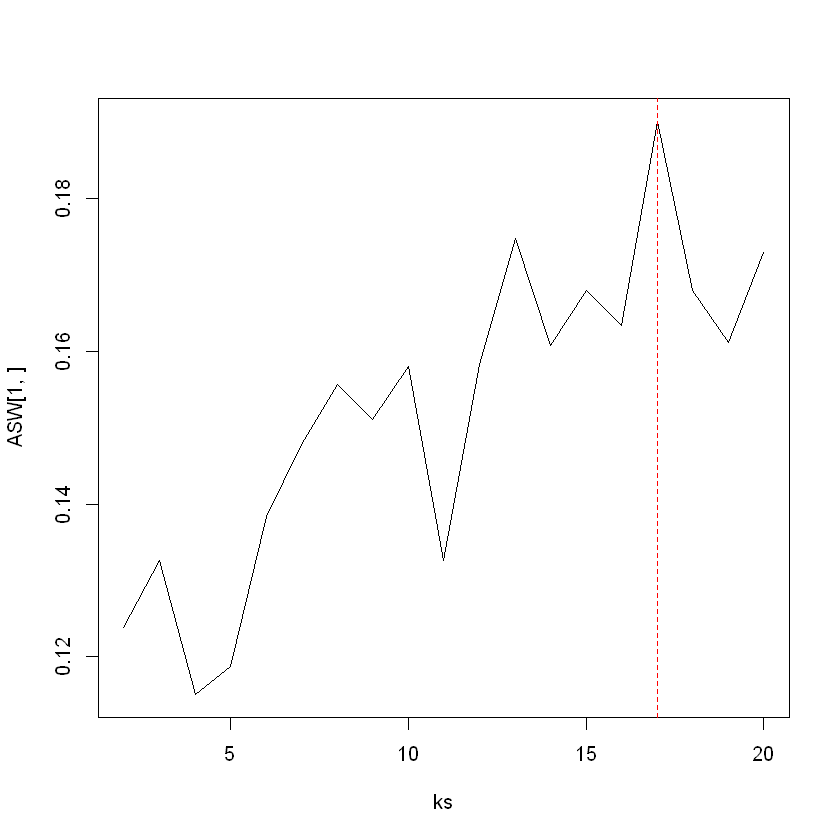

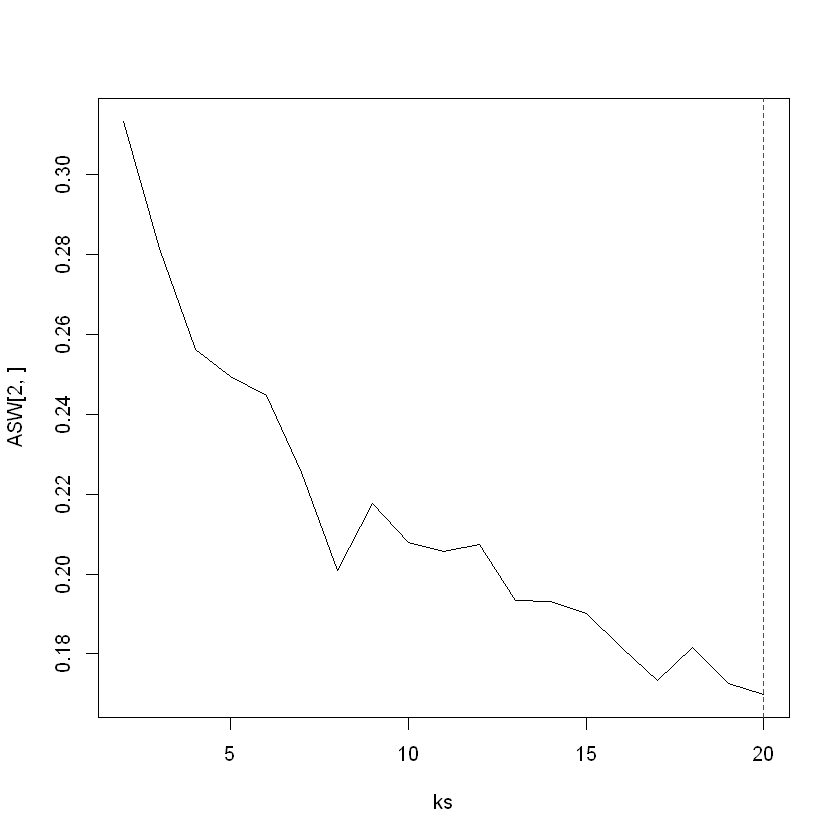

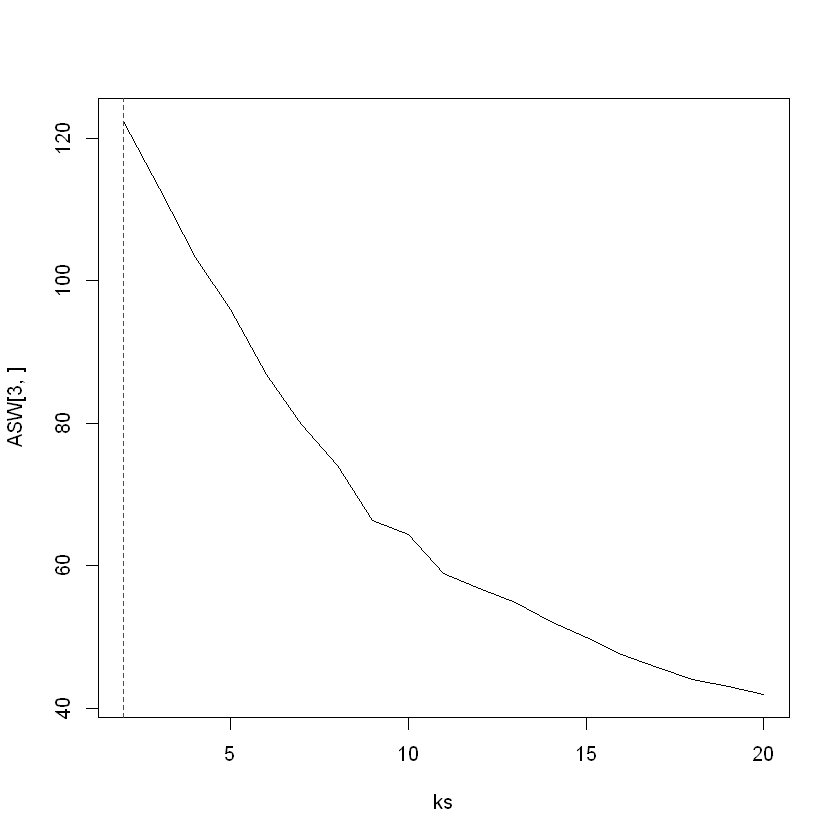

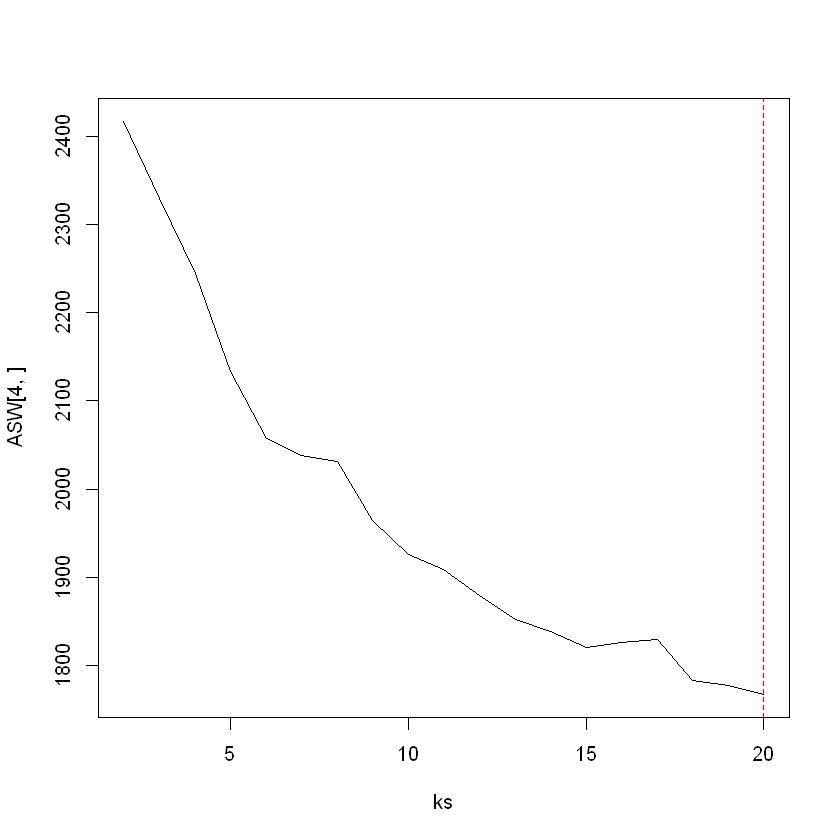

In [17]:
ks <- 2:20
ASW <- sapply(ks, FUN=function(k) {
  data_aux <- kmeans(df[,-c(1,35)],centers=k)$cluster
  as.numeric(intCriteria(as.matrix(df[,-c(1,35)]),data_aux,c("Dunn","C_index","Calinski_Harabasz","Ball_Hall")))
})
show(ASW)

[1] 20
[1] 20
[1] 2
[1] 20


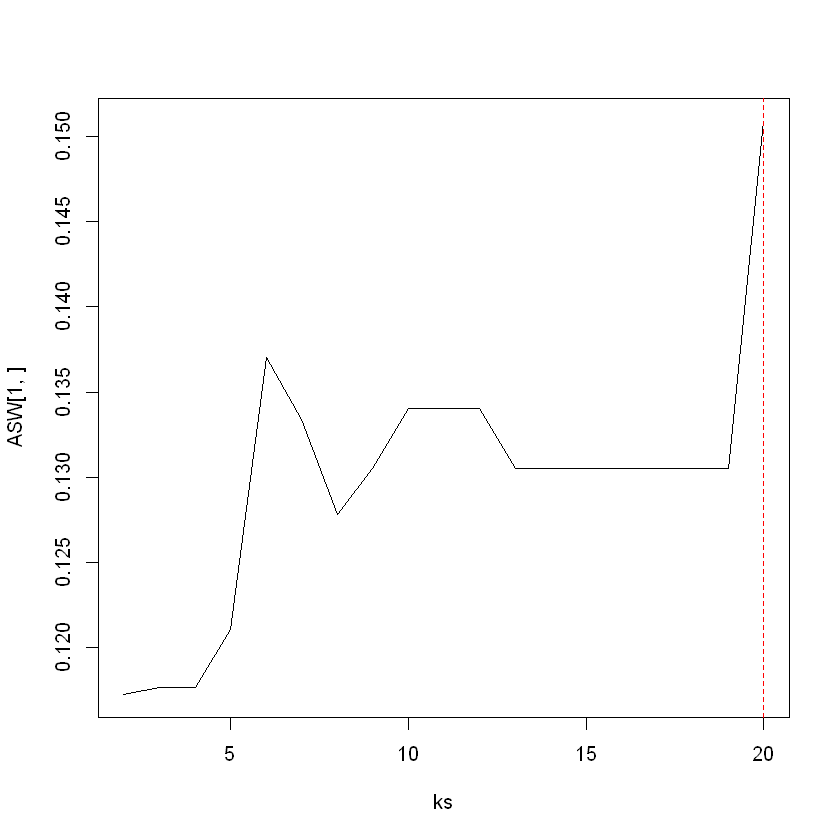

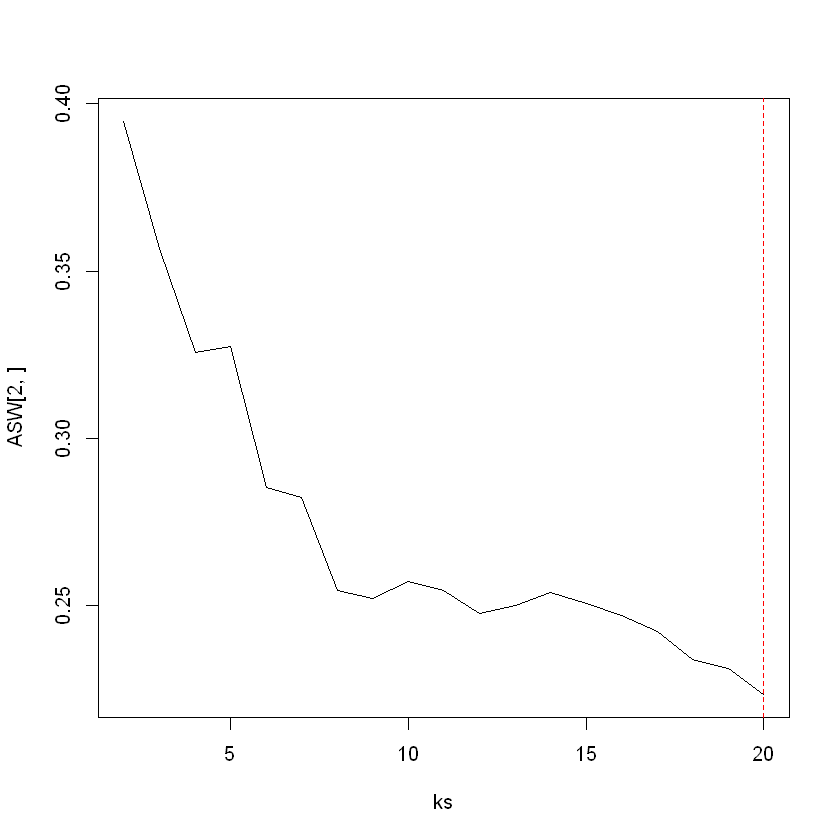

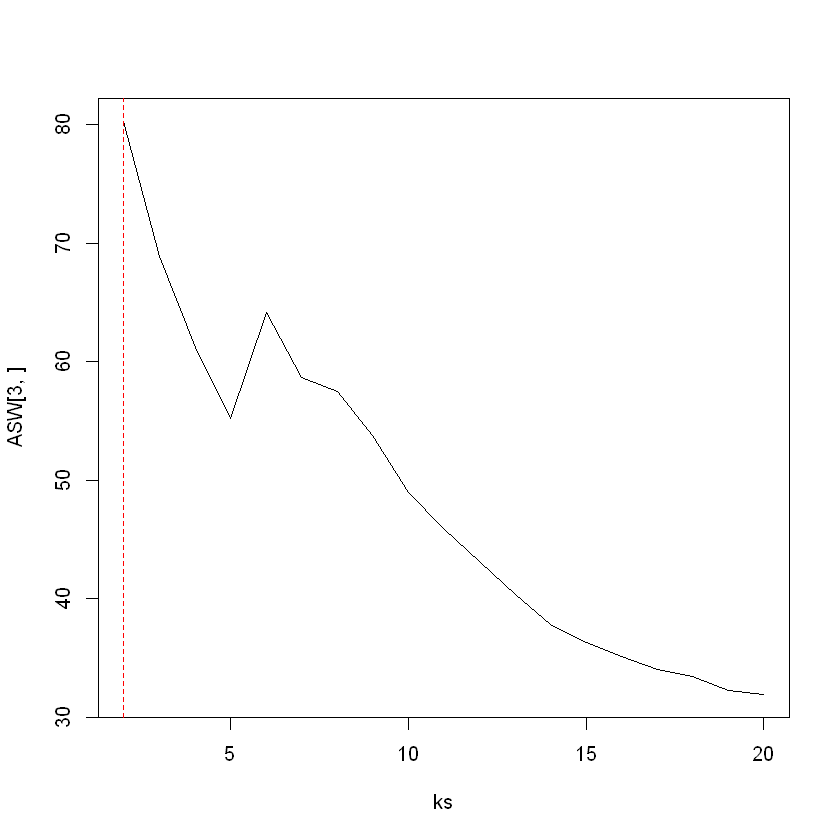

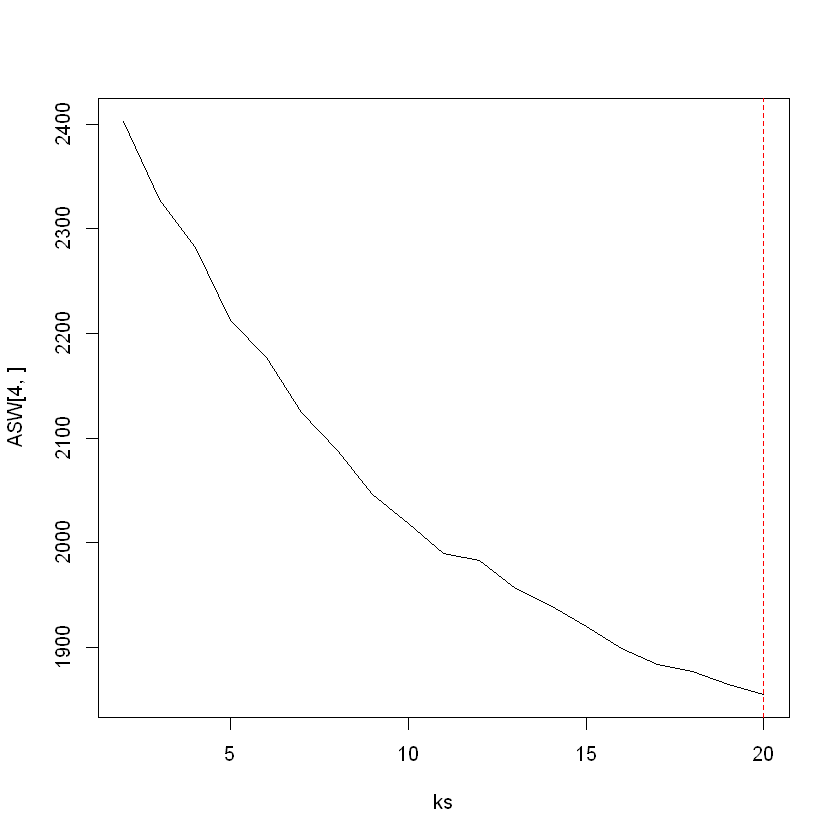

In [19]:
ks <- 2:20
ASW <- sapply(ks, FUN=function(k) {
  data_aux <- pam(df[,-c(1,35)],k=k,metric = "euclidean",stand = FALSE)$cluster
  as.numeric(intCriteria(as.matrix(df[,-c(1,35)]),data_aux,c("Dunn","C_index","Calinski_Harabasz","Ball_Hall")))
})
show(ASW)

In [9]:
#Partioning dataset into two clusters (now considering k-means and k-medoids as well)
data_single_cluster<-cutree(data_single,2)
data_complete_cluster<-cutree(data_complete,2)
data_average_cluster<-cutree(data_average,2)
data_ward_cluster<-cutree(data_ward,2)
k1<-kmeans(df[,-c(1,35)],centers=2)
k2<-pam(df[,-c(1,35)],k=2,metric = "euclidean",stand = FALSE)
data_diana_cluster<-cutree(data_diana,2)

In [10]:
#Confusion matrix of different partitioning methods, considering the real classes of the original data
table(data_single_cluster,df[,35])
table(data_complete_cluster,df[,35])
table(data_average_cluster,df[,35])
table(data_ward_cluster,df[,35])
table(k1$cluster,df[,35])
table(k2$cluster,df[,35])
table(data_diana_cluster,df[,35])

                   
data_single_cluster    0    1
                  1 1645   54
                  2    1    0

                     
data_complete_cluster    0    1
                    1 1645   54
                    2    1    0

                    
data_average_cluster    0    1
                   1 1645   54
                   2    1    0

                 
data_ward_cluster    0    1
                1 1552   48
                2   94    6

   
       0    1
  1 1217   33
  2  429   21

   
      0   1
  1 981  24
  2 665  30

                  
data_diana_cluster    0    1
                 1 1510   46
                 2  136    8

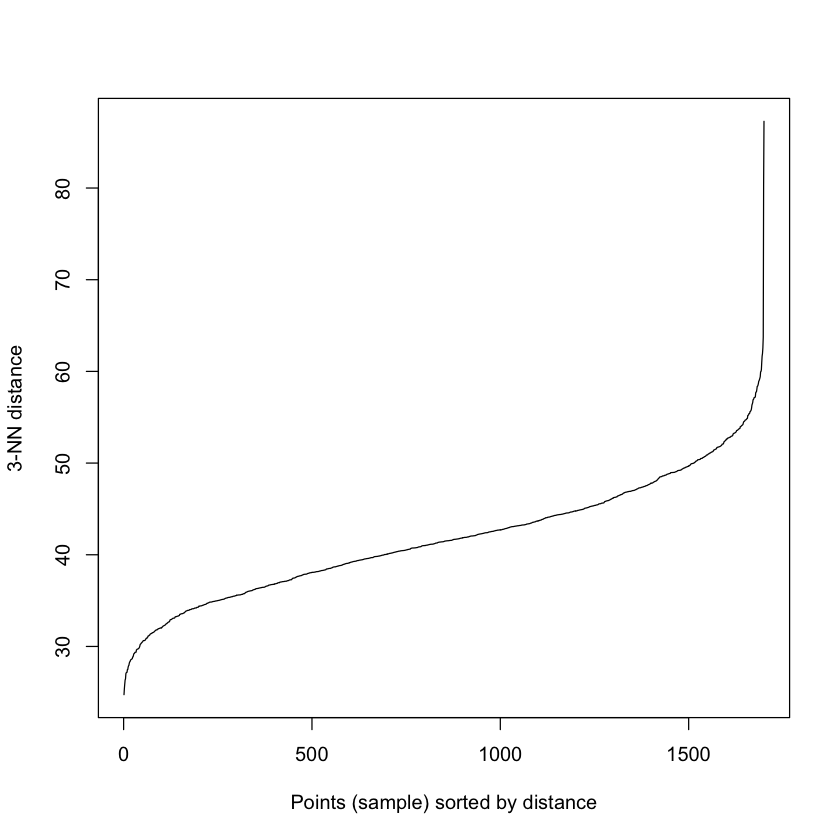

In [31]:
#Find eps for DBScan
kNNdistplot(df[,-c(1,35)], k=3)

In [16]:
# Fitting DBScan clustering Model 
# to training dataset
Dbscan_cl <- dbscan(df[,-c(1,35)], eps = 51, MinPts = 3)
Dbscan_cl
  
# Checking cluster
#Dbscan_cl$cluster
  
# Table
table(Dbscan_cl$cluster, df$resposta)
  
# Plotting Cluster
#plot(Dbscan_cl, df[,-c(1,35)], main = "DBScan")
#plot(Dbscan_cl, df[,-c(1,35)], main = "Petal Width vs Sepal Length")

Warning message in dbscan(df[, -c(1, 35)], eps = 51, MinPts = 3):
"converting argument MinPts (fpc) to minPts (dbscan)!"

DBSCAN clustering for 1700 objects.
Parameters: eps = 51, minPts = 3
The clustering contains 2 cluster(s) and 65 noise points.

   0    1    2 
  65 1632    3 

Available fields: cluster, eps, minPts

   
       0    1
  0   60    5
  1 1583   49
  2    3    0

Finding the best number of clusters for the kernel k means:

Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (

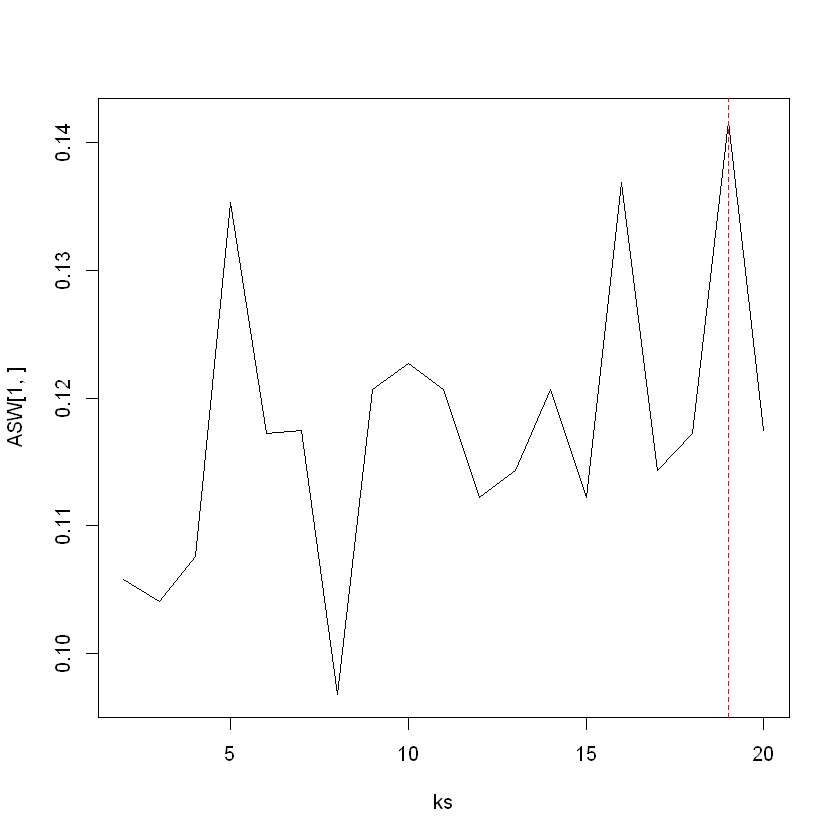

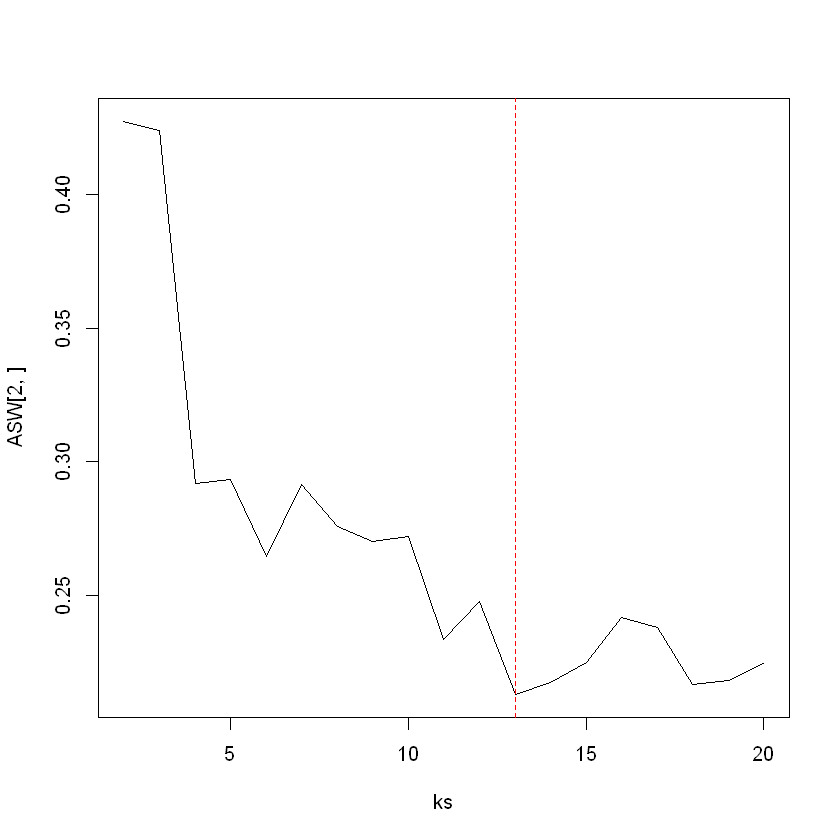

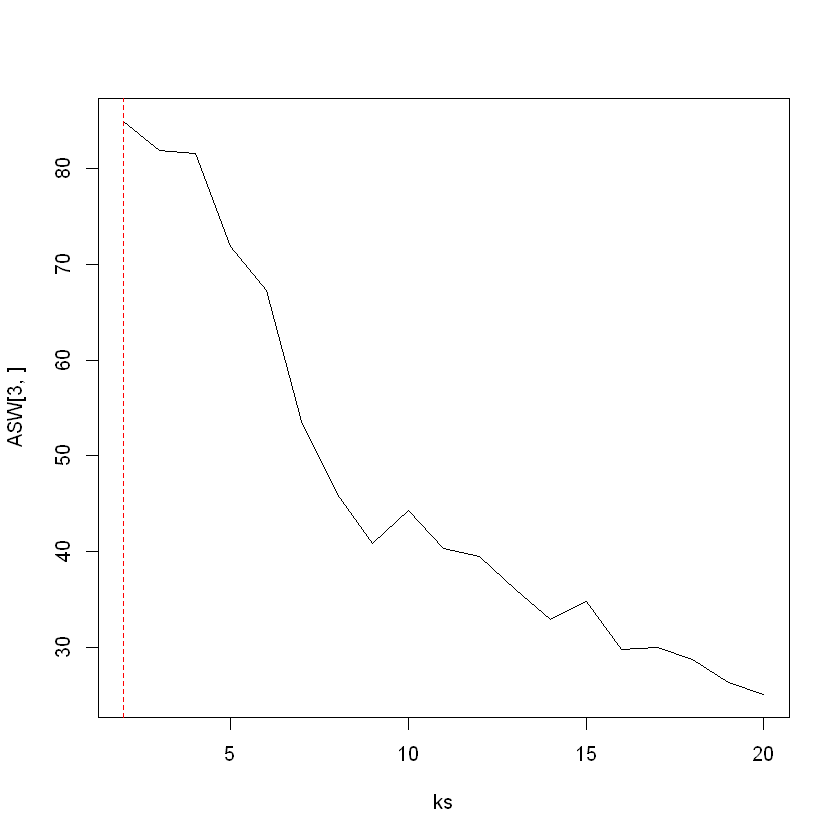

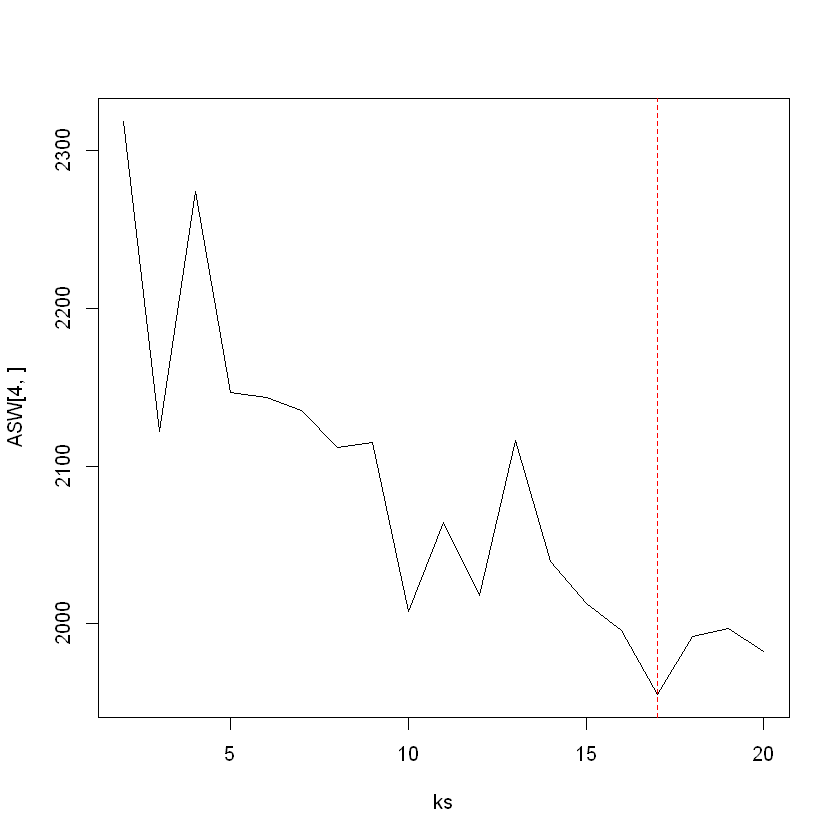

In [20]:
ks <- 2:20
ASW <- sapply(ks, FUN=function(k) {
  data_aux <- kkmeans(as.matrix(df[,-c(1,35)]), kernel = "rbfdot", centers=k)[1:1700]
  as.numeric(intCriteria(as.matrix(df[,-c(1,35)]),data_aux,c("Dunn","C_index","Calinski_Harabasz","Ball_Hall")))
})
show(ASW)

Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Using automatic sigma estimation (

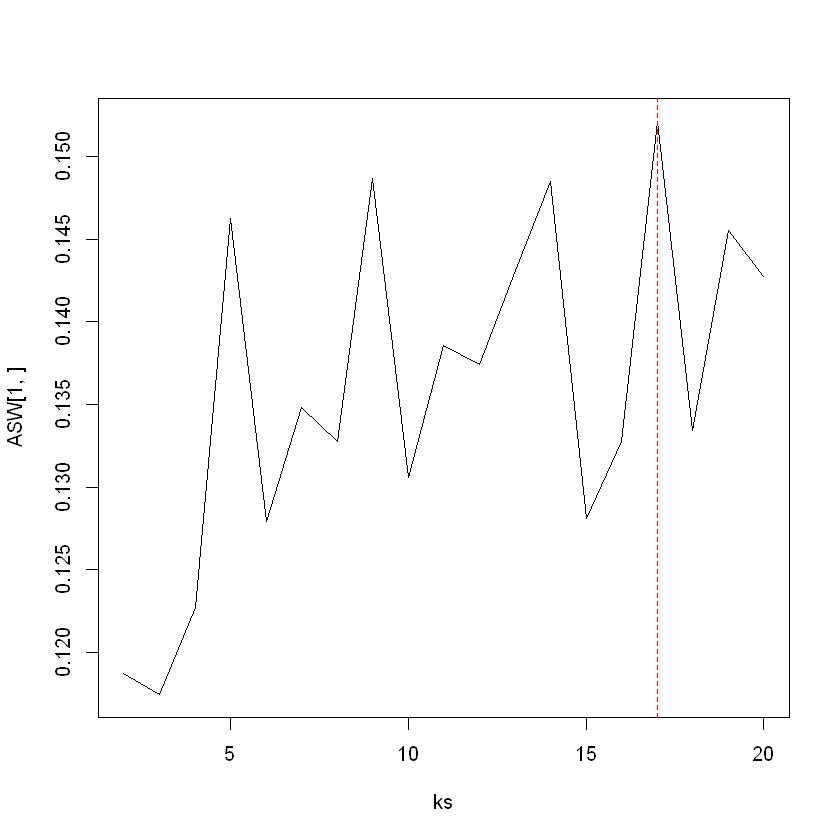

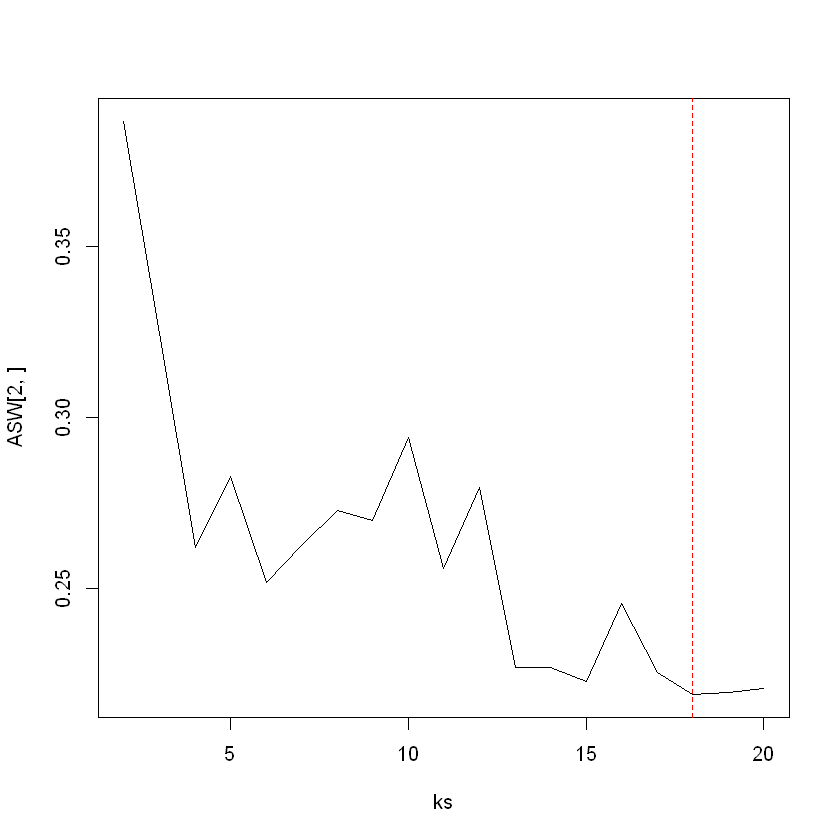

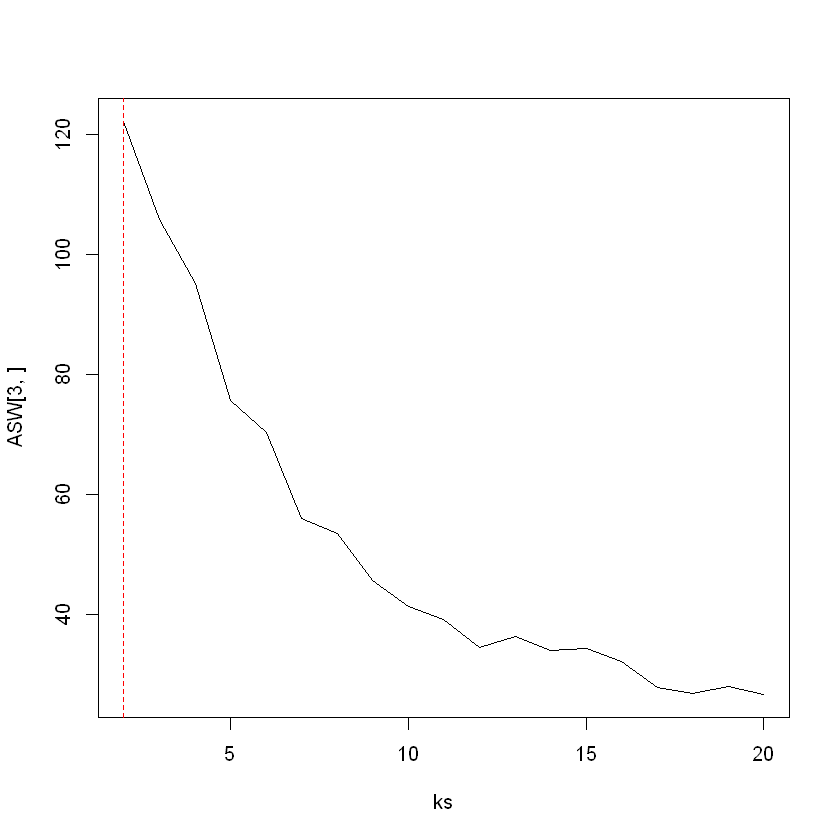

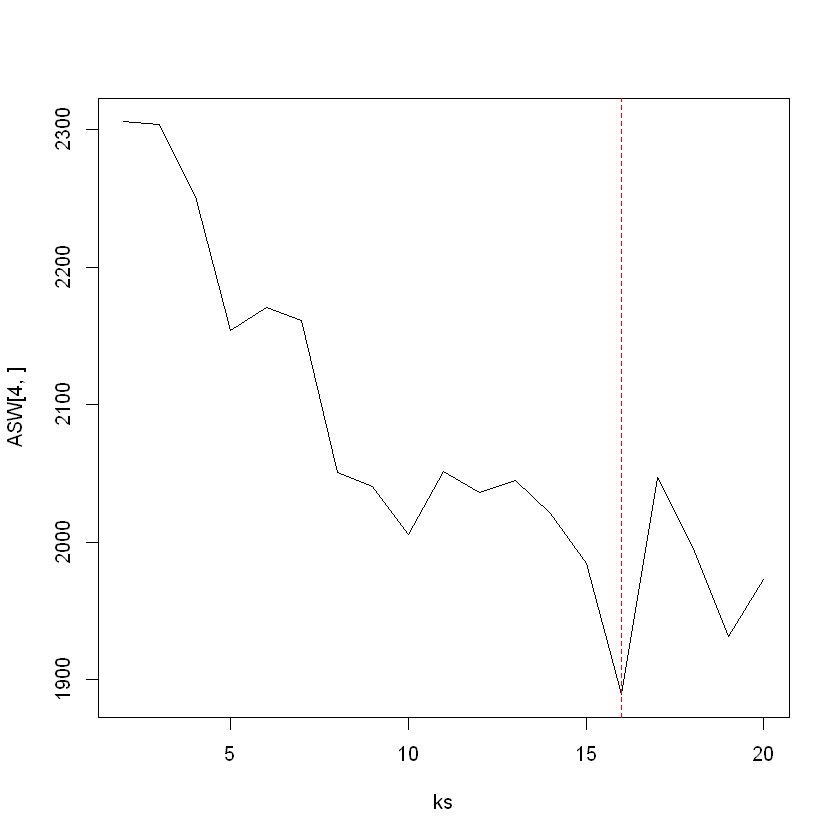

In [21]:
ks <- 2:20
ASW <- sapply(ks, FUN=function(k) {
  data_aux <- kkmeans(as.matrix(df[,-c(1,35)]), kernel = "laplacedot", centers=k)[1:1700]
  as.numeric(intCriteria(as.matrix(df[,-c(1,35)]),data_aux,c("Dunn","C_index","Calinski_Harabasz","Ball_Hall")))
})
show(ASW)

In [11]:
#Kernel k-means
set.seed(32)
dfkernel <- kkmeans(as.matrix(df[,-c(1,35)]), kernel = "rbfdot", centers=2)
#dfkernel
#centers(dfkernel)
size(dfkernel)
#withinss(dfkernel)
table(dfkernel, df$resposta)
#plot(as.matrix(df[,-c(1,35)]),col=dfkernel)

Using automatic sigma estimation (sigest) for RBF or laplace kernel 


[1] 849 851

        
dfkernel   0   1
       1 841   8
       2 805  46

In [9]:
#Kernel k-means
set.seed(32)
dfkernel2 <- kkmeans(as.matrix(df[,-c(1,35)]), kernel = "laplacedot", centers=2)
#dfkernel
#centers(dfkernel)
size(dfkernel2)
#withinss(dfkernel)
table(dfkernel2, df$resposta)
#plot(as.matrix(df[,-c(1,35)]),col=dfkernel)

Using automatic sigma estimation (sigest) for RBF or laplace kernel 


[1] 988 712

         
dfkernel2   0   1
        1 969  19
        2 677  35

best number of clusters for the spectral clustering methods:

[1] 19
[1] 18
[1] 4
[1] 20


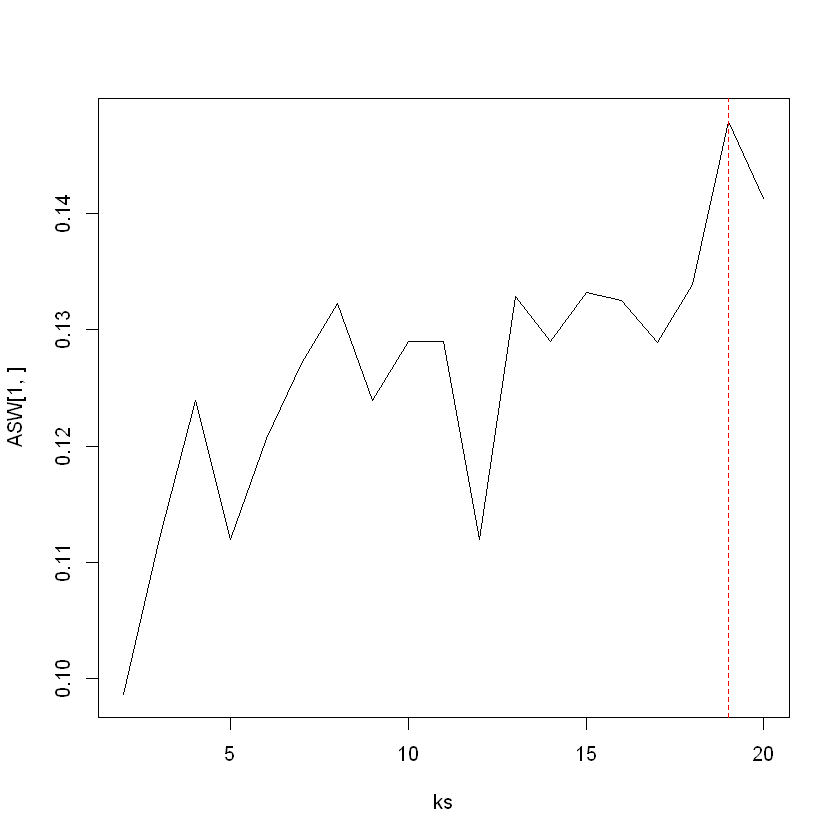

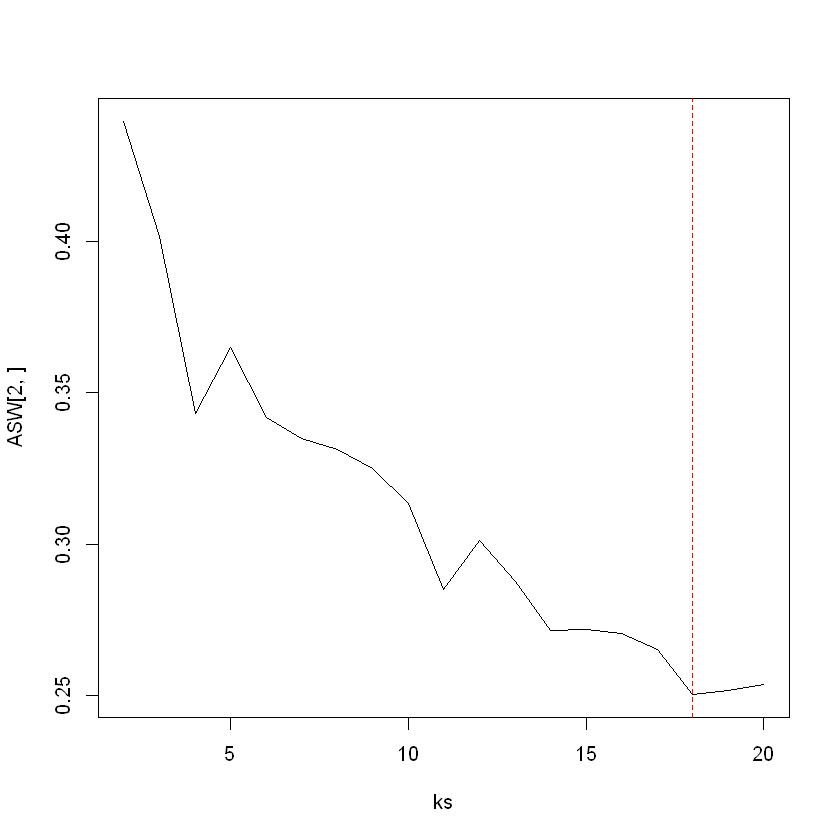

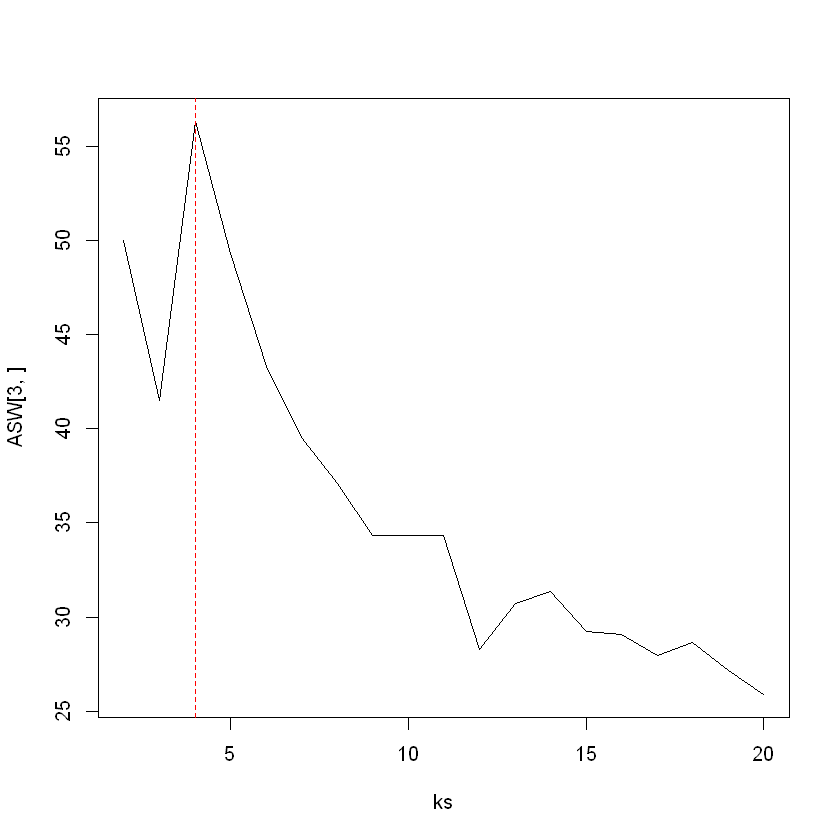

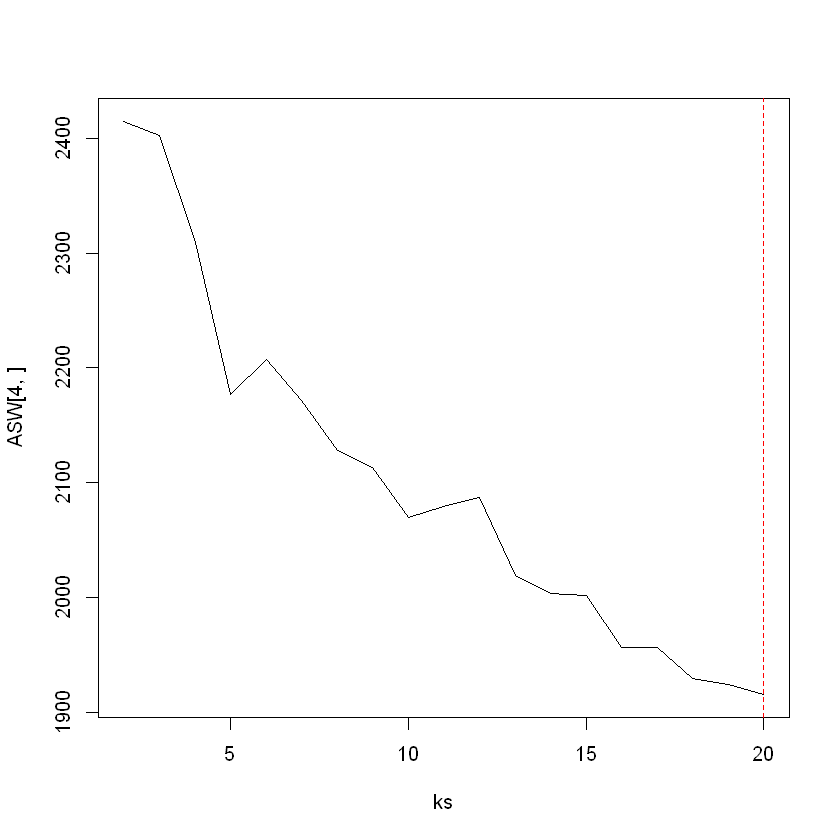

In [22]:
ks <- 2:20
ASW <- sapply(ks, FUN=function(k) {
  data_aux <- specc(as.matrix(scale(df[,-c(1,35)])),centers=k)[1:1700]
  as.numeric(intCriteria(as.matrix(df[,-c(1,35)]),data_aux,c("Dunn","C_index","Calinski_Harabasz","Ball_Hall")))
})
show(ASW)

In [ ]:
ks <- 2:20
ASW <- sapply(ks, FUN=function(k) {
  data_aux <- specc(as.data.frame(t(scale(df[,-c(1,35)]))),centers=k)[1:1700]
  as.numeric(intCriteria(as.matrix(df[,-c(1,35)]),data_aux,c("Dunn","C_index","Calinski_Harabasz","Ball_Hall")))
})
show(ASW)

In [10]:
#Spectral clustering
dfspectral<-specc(as.matrix(scale(df[,-c(1,35)])),centers=2)
#dfspectral
#centers(dfspectral)
#size(dfspectral)
#withinss(dfspectral)
table(dfspectral, df$resposta)
#plot(as.matrix(df[,-c(1,35)]),col=dfspectral)

          
dfspectral   0   1
         1 761  34
         2 885  20

In [19]:
dissimilaritymatrix <- as.matrix(dist(df[,-c(1,35)]))
results <- mst.knn(dissimilaritymatrix)
results

$network
IGRAPH 18dae32 UN-- 1700 1675 -- 
+ attr: name (v/c)
+ edges from 18dae32 (vertex names):
 [1] 1647--1670 1643--1669 1614--1700 1647--1613 1606--1688 1605--1673
 [7] 1605--1645 1595--1697 1594--1602 1579--1697 1579--1673 1578--1673
[13] 1643--1578 1578--1597 1576--1669 1566--1604 1551--1623 1576--1522
[19] 1510--1700 1510--1670 1510--1620 1605--1510 1510--1511 1508--1660
[25] 1508--1597 1566--1508 1502--1518 1496--1623 1460--1509 1460--1479
[31] 1456--1479 1454--1536 1446--1509 1551--1347 1347--1418 1314--1485
[37] 1314--1336 1551--1306 1276--1341 1244--1602 1239--1596 1551--1182
[43] 1180--1546 1180--1544 1244--1180 1143--1168 1136--1518 1111--1674
+ ... omitted several edges

$cnumber
[1] 25

$cluster
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   1    6    6    1    7   16    1    1    6    1    8    1    1   21    6    7 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
  16   21   23    9    1   10    1 

In [20]:
table(results$partition[,2], df$resposta)

    
       0   1
  1  270   0
  2   20   0
  3   14   0
  4   20   0
  5   11   0
  6  162   0
  7  241   0
  8   21   0
  9  138   0
  10  10   0
  11  26   0
  12 133   0
  13  10   0
  14   3   0
  15   5   0
  16 108   0
  17 104   0
  18  23   0
  19   8   0
  20  17   0
  21 113   2
  22   2   1
  23 172  41
  24  11   9
  25   4   1

# Internal Criteria 

In [11]:
print("single linkage:")
as.numeric(intCriteria(as.matrix(df[,-c(1,35)]),cutree(data_single,2),c("Dunn","C_index","Calinski_Harabasz","Ball_Hall")))
print("complete linkage:")
as.numeric(intCriteria(as.matrix(df[,-c(1,35)]),cutree(data_complete,2),c("Dunn","C_index","Calinski_Harabasz","Ball_Hall")))
print("average linkage:")
as.numeric(intCriteria(as.matrix(df[,-c(1,35)]),cutree(data_average,2),c("Dunn","C_index","Calinski_Harabasz","Ball_Hall")))
print("ward's method:")
as.numeric(intCriteria(as.matrix(df[,-c(1,35)]),cutree(data_ward,2),c("Dunn","C_index","Calinski_Harabasz","Ball_Hall")))
print("Diana:")
as.numeric(intCriteria(as.matrix(df[,-c(1,35)]),cutree(data_diana,2),c("Dunn","C_index","Calinski_Harabasz","Ball_Hall")))
print("k-means:")
as.numeric(intCriteria(as.matrix(df[,-c(1,35)]),k1$cluster,c("Dunn","C_index","Calinski_Harabasz","Ball_Hall")))
print("k-medoids:")
as.numeric(intCriteria(as.matrix(df[,-c(1,35)]),k2$cluster,c("Dunn","C_index","Calinski_Harabasz","Ball_Hall")))
print("kernel k-means:")
as.numeric(intCriteria(as.matrix(df[,-c(1,35)]),dfkernel[1:1700],c("Dunn","C_index","Calinski_Harabasz","Ball_Hall")))
print("kernel kmeans2:")
as.numeric(intCriteria(as.matrix(df[,-c(1,35)]),dfkernel2[1:1700],c("Dunn","C_index","Calinski_Harabasz","Ball_Hall")))
print("spectral:")
as.numeric(intCriteria(as.matrix(df[,-c(1,35)]),dfspectral[1:1700],c("Dunn","C_index","Calinski_Harabasz","Ball_Hall")))

[1] "single linkage:"


[1] 3.958954e-01 7.179309e-02 6.987129e+00 1.232775e+03

[1] "complete linkage:"


[1]    0.4397505    0.2220319    5.2022453 1234.0669397

[1] "average linkage:"


[1] 3.958954e-01 7.179309e-02 6.987129e+00 1.232775e+03

[1] "ward's method:"


[1]    0.2127720    0.2115306   97.0691540 2589.8471205

[1] "Diana:"


[1]    0.1711547    0.2073477   74.5768275 2900.1770921

[1] "k-means:"


[1]    0.1187245    0.3831428  123.9894060 2307.5428348

[1] "k-medoids:"


[1]    0.1172492    0.3946973   80.2938509 2402.7991730

[1] "kernel k-means:"


[1]    0.1254857    0.3932550   94.7739403 2342.8281211

[1] "kernel kmeans2:"


[1]    0.1685680    0.3409813  112.7551667 2381.7905903

[1] "spectral:"


[1] 9.860885e-02 4.395426e-01 4.980553e+01 2.416016e+03

## Classifier

In [12]:
#Adding a column to the original response variable with the cluster it belongs to:
#small detail: replacing cluster numbers with the corresponding response class
df_cluster<-df[,-c(1)]
df_realresponse <- df[,-c(1)]
for(i in 1:length(df$resposta)){
  if(dfkernel[i]==1){
    df_cluster$cluster[i]=0
  }
  else{
    df_cluster$cluster[i]=1
  }
}

In [13]:
df_cluster$cluster<- as.factor(df_cluster$cluster)

set.seed(5968) #in order to have the same testing and train groups as in the fist project

indxTrain <- createDataPartition(y = df_cluster$cluster ,p = 0.9,list = FALSE)
data.train_cluster <- df_cluster[indxTrain,]
data.test_cluster <- df_cluster[-indxTrain,] 

data.train_rr <- df_realresponse[indxTrain,]
data.test_rr <- df_realresponse[-indxTrain,] 



x = caret::trainControl(method = 'cv',
                        number = 10
)

Training in order to identify the cluster to which it belongs to:

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 79  4
         1  5 81
                                          
               Accuracy : 0.9467          
                 95% CI : (0.9013, 0.9754)
    No Information Rate : 0.503           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8935          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9405          
            Specificity : 0.9529          
         Pos Pred Value : 0.9518          
         Neg Pred Value : 0.9419          
              Precision : 0.9518          
                 Recall : 0.9405          
                     F1 : 0.9461          
             Prevalence : 0.4970          
         Detection Rate : 0.4675          
   Detection Prevalence : 0.4911          
      Balanced Accuracy : 0.9467    

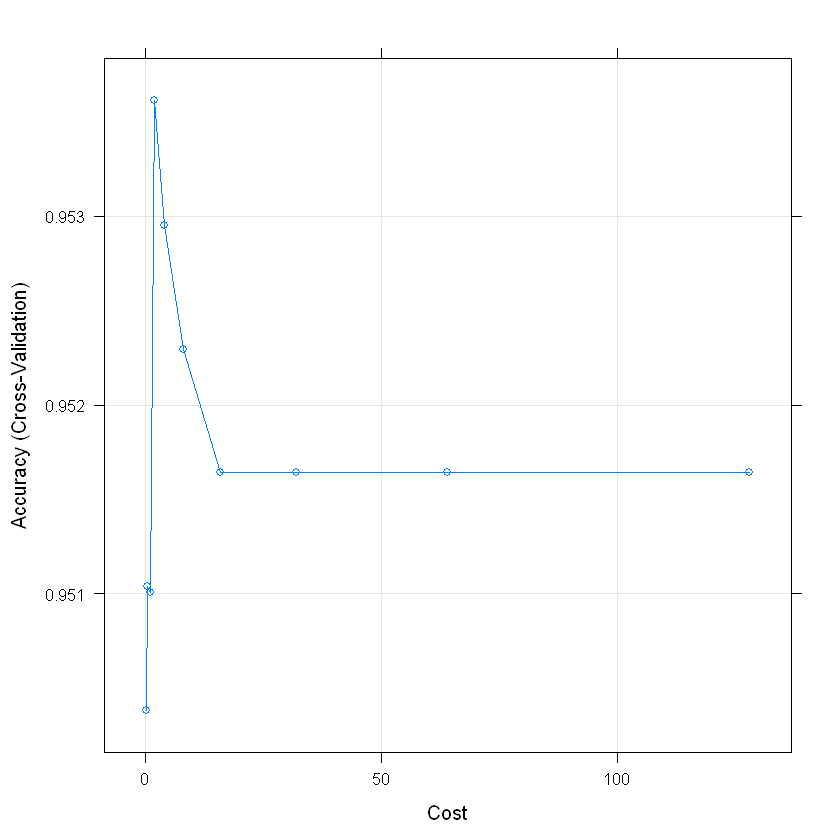

In [14]:
modelsvm<- caret::train(cluster~. , data = data.train_cluster, method = 'svmRadial',
                 trControl = x, preProcess = c("center","scale"),  
                 tuneLength = 10)
#modelsvm
plot(modelsvm)

#confusion matrix and statistics for the model 
test_pred_svm <- predict(modelsvm, newdata = data.test_cluster)
confusionMatrix(test_pred_svm, data.test_cluster$cluster,mode="everything")

Comparing the results given by the clusters to the real response variable for the test data

In [15]:
confusionMatrix(test_pred_svm, data.test_rr$resposta,mode="everything", positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 81  2
         1 79  7
                                         
               Accuracy : 0.5207         
                 95% CI : (0.4427, 0.598)
    No Information Rate : 0.9467         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.0564         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.77778        
            Specificity : 0.50625        
         Pos Pred Value : 0.08140        
         Neg Pred Value : 0.97590        
              Precision : 0.08140        
                 Recall : 0.77778        
                     F1 : 0.14737        
             Prevalence : 0.05325        
         Detection Rate : 0.04142        
   Detection Prevalence : 0.50888        
      Balanced Accuracy : 0.64201        
              

Comparison between clusters and the real response variable:

In [16]:
table(df_cluster$cluster, df_cluster$resposta)

   
      0   1
  0 841   8
  1 805  46

In [21]:
print("confusion matrix: first collum -> are truly positive;  second line -> are classified as negative")
tt2<-table(df_cluster$cluster, df_cluster$resposta);print(tt2)
print("accuracy:")
acc2<-sum(diag(tt2))/sum(tt2);print(acc2)
print("recalls:")
recalls2 <- to_vec(for(i in 1:2) if(TRUE) diag(tt2)[i]/sum(tt2[,i]));print(recalls2)
print("precisions:")
precisions2 <- to_vec(for(i in 1:2) if(TRUE) diag(tt2)[i]/sum(tt2[i,]));print(precisions2)
print("F1_measures:")
F1_measure2 <-to_vec(for(i in 1:2) if(TRUE) 2*recalls2[i]*precisions2[i]/(recalls2[i]+precisions2[i])  );print(F1_measure2)
print("Overall F1_measure:")
F1_2<- mean(c(F1_measure2));print(F1_2)

[1] "confusion matrix: first collum -> are truly positive;  second line -> are classified as negative"
   
      0   1
  0 841   8
  1 805  46
[1] "accuracy:"
[1] 0.5217647
[1] "recalls:"
[1] 0.5109356 0.8518519
[1] "precisions:"
[1] 0.99057715 0.05405405
[1] "F1_measures:"
[1] 0.6741483 0.1016575
[1] "Overall F1_measure:"
[1] 0.3879029
